<h1 style="text-align: center;">Titanic Challenger</h1>

<img src="http://data.freehdw.com/ships-titanic-vehicles-best.jpg"  Width="800">

## Table of contents
***
- [Introduction](#introduction)
- [Kernel Goals](#aboutthiskernel)
- [Part 1: Importing Necessary Modules](#import_libraries)
    - [1a. Libraries](#import_libraries)
    - [1b. Load datasets](#load_data)
    - [1c. A Glimpse of the dataset](#glimpse)
    - [1d. About this dataset](#aboutthisdataset)
    - [1e. Tableau Visualization](#tableau_visualization)
- [Part 2: Overview and Cleaning the Data](#scrubbingthedata)
    - [2a. Overview](#cleaningthedata)
    - [2b. Dealing with missing values](#dealwithnullvalues)
- [Part 3: Visualization and Feature Relations](#visualization_and_feature_relations)
    - [3a. Gender and Survived](#gender_and_survived)
    - [3b. Pclass and Survived](#pclass_and_survived)
    - [3c. Fare and Survived](#fare_and_survived)
    - [3d. Age and Survived](#age_and_survived)
    - [3e. Combined Feature relations](#combined_feature_relations)
- [Part 4: Statistical Overview](#statisticaloverview)
    - [4a. Correlation Matrix and Heatmap](#heatmap)
- [Part 5: Feature Engineering](#feature_engineering)
- [Part 6: Pre-Modeling Tasks](#pre_model_tasks)
    - [6a. Separating dependent and independent variables](#dependent_independent)
    - [6b. Splitting the training data](#split_training_data)
    - [6c. Feature Scaling](#feature_scaling)
- [Part 7: Modeling the Data](#modelingthedata)
    - [7a. Logistic Regression](#logistic_regression)
    - [7b. K-Nearest Neighbors(KNN)](#knn)
    - [7c. Gaussian Naive Bayes](#gaussian_naive)
    - [7d. Support Vector Machines](#svm)
    - [7e. Decision Tree Classifier](#decision_tree)
    - [7f. Bagging on Decision Tree Classifier](#bagging_decision)
    - [7g. Random Forest Classifier](#random_forest)
    - [7h. Gradient Boosting Classifier](#gradient_boosting)
    - [7i. XGBClassifier](#XGBClassifier)
    - [7j. AdaBoost Classifier](#adaboost)
    - [7k. Extra Tree Classifier](#extra_tree)
    - [7l. Gaussian Process Classifier](#GaussianProcessClassifier)
    - [7m. Voting Classifier](#voting_classifier)
- [Part 8: Submit Test Predictions](#submit_predictions)
    
- [ Credits](#credits)

# Objetivos do kernel

<a id="aboutthiskernel"></a>
***
Existem três objetivos principais deste kernel.
- <b>Fazer uma análise estatística </b> de como um grupo de pessoas sobreviveu mais do que outros. 
- <b>Fazer uma análise exploratória de dados (EDA) </b> de titânico com visualizações e narração de histórias.  
- <b>Predizer</b>: Usar modelos de machine learning para prever as chances de sobrevivência dos passageiros.


# Part 1: Importando bibliotecas e o conjuntos de dados necessários
***
<a id="import_libraries**"></a>
## 1a. Importando bibliotecas

In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os
print(os.listdir("input/")) 

['gender_submission.csv', 'test.csv', 'train.csv']


## 1b. Importando o conjunto de dados
<a id="load_data"></a>
***

In [2]:
## Importing the datasets
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

Você provavelmente está se perguntando por que dois conjuntos de dados? Além disso, por que o nomeei "treinar" e "testar"? Para explicar que vou dar uma visão geral do processo de aprendizado de máquina supervisionado.

"Machine Learning" é simplesmente "máquina" e "aprendizado". Nada mais e nada menos. Em um processo supervisionado de aprendizado de máquina, estamos fornecendo dados de entradas específicos à máquina/computador/modelos (texto/número/imagem/áudio) para aprender, ou seja, estamos treinando a máquina para aprender algo com base nos dados e na saída. Agora, como sabemos que o que estamos ensinando é o que eles estão aprendendo? É aí que o conjunto de testes vem para jogar. Nós retemos parte dos dados onde conhecemos a saída/resultado dos algoritmos e usamos esses dados para testar o modelo de aprendizado de máquina treinado. Em seguida, comparamos os resultados para determinar o desempenho das máquinas.

<img src="../imagens/split_dataset_logo.png" width=400 height=400>


## 1c. Vislumbre do Datasets. 
<a id="glimpse"></a>
***

**> Sample train dataset**

In [3]:
## Take a look at the overview of the dataset. 
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q


**> Sample test dataset**

In [4]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
195,1087,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S
353,1245,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,65.0000,NaN,S
367,1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
106,998,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S


Esta é uma amostra do conjunto de dados de treinamento e teste. Vamos descobrir um pouco mais sobre o dataset.

 ## 1d. Sobre o Dataset
<a id="aboutthisdataset"></a>
***
Os dados foram divididos em dois grupos:

- training set (train.csv)
- test set (test.csv)

***O conjunto de treino inclui nosso target (variável dependente), status de sobrevivência do passageiro*** (também conhecida como a verdade fundamental da tragédia do Titanic), além de outros recursos independentes, como gender, sobrevivência, fare e Pclass.

O conjunto de testes deve ser usado para ver o desempenho do nosso modelo em dados não vistos. Quando dizemos dados invisíveis, queremos dizer que o algoritmo ou os modelos de aprendizado de máquina não têm relação com os dados de teste. Não queremos usar nenhuma parte dos dados de teste para modificar nossos algoritmos; Quais são as razões pelas quais limpamos nossos dados de teste e treinamos dados separadamente. ***O conjunto de teste nao fornece status de sobrevivencia do passageiro***. Nós iremos usar nosso modelo para predizer o status de sobrevivencia do passageiro.

Agora vamos analisar as features e descreve-las um pouco. Existem alguns tipos diferentes de variáveis, eles são ...

***
**Categorical:**
- **Nominal** (variáveis que possuem duas ou mais categorias, mas que não possuem uma ordem intrínseca.)
   > - **Cabin**
   > - **Embarked** (Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown) 
            S(Southampton)
        
- **Dichotomous**(Variáveis nominais que possuem apenas duas categorias)
   > - **Sex**
            Female
            Male
- **Ordinal**(Variáveis que possuem duas ou mais categorias assim como variáveis nominais. Porém essas categorias podem ser ordenadas.)
   > - **Pclass** (A proxy for socio-economic status (SES)) 
            1(Upper)
            2(Middle) 
            3(Lower)
***
**Numeric:**
- **Discrete**
  >  - **Passenger ID** (identificador unico # para cada passageiro)
  >  - **SibSp**
  >  - **Parch**
  >  - **Survived** (nosso target ou variável dependente)
            0
            1
- **Continous**
  >  - **Age**
  >  - **Fare**
***
**Text Variable:**
- > **Ticket** (número do bilhete do passageiro.)
- > **Name**(  Nome do passageiro.) 



# Part 2: Overview e limpeza dos dados
<a id="cleaningthedata"></a>
***
## 2a. Overview

Datasets no mundo real geralmente são confusos. No entanto, esse dataset está quase limpo, isto dito, vamos analisar e ver o que temos aqui.

In [5]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId
## We will drop PassengerID and Ticket since it will be useless for our data. 
#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

Parece que as features têm uma quantidade desigual de entradas de dados para cada coluna e têm diferentes tipos de variáveis. Isso pode acontecer pelos seguintes motivos ...
* Podemos ter valores ausentes em nossas features.
* Podemos ter valores features categoricas. 
* Podemos ter valores features alfanuméricos e/ou texto.

## 2b. Lidando com valores ausentes

<a id="dealwithnullvalues"></a>
***
**Valores ausentes no dataset de *treino*.**

In [6]:
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


**Valores ausentes no dataset de *teste*.**

In [7]:
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


Vemos que no dataset de **treino** e **teste** existem valores ausentes. Vamos fazer um esforço para preencher esses valores.


### Embarked feature
***

In [8]:
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100,2))
## creating a df with th
total = pd.DataFrame(train.Embarked.value_counts(dropna=False))
## concating percent and total dataframe

total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


Parece que existem apenas dois valores nulos (~0,22%) na feature Embarked. Podemos substituí-los pelo valor do modo "S". No entanto, vamos nos aprofundar um pouco mais.

**Vamos ver o que são esses dois valores nulos**

Podemos resolver esses dois valores ausentes observando outras variáveis independentes das duas rows. Ambos os passageiros pagaram uma tarifa de $80, são da Pclass 1 e do sexo feminino. Vamos ver como o **Fare** é distribuído entre todos os valores das features **Pclass** e **Embarked**

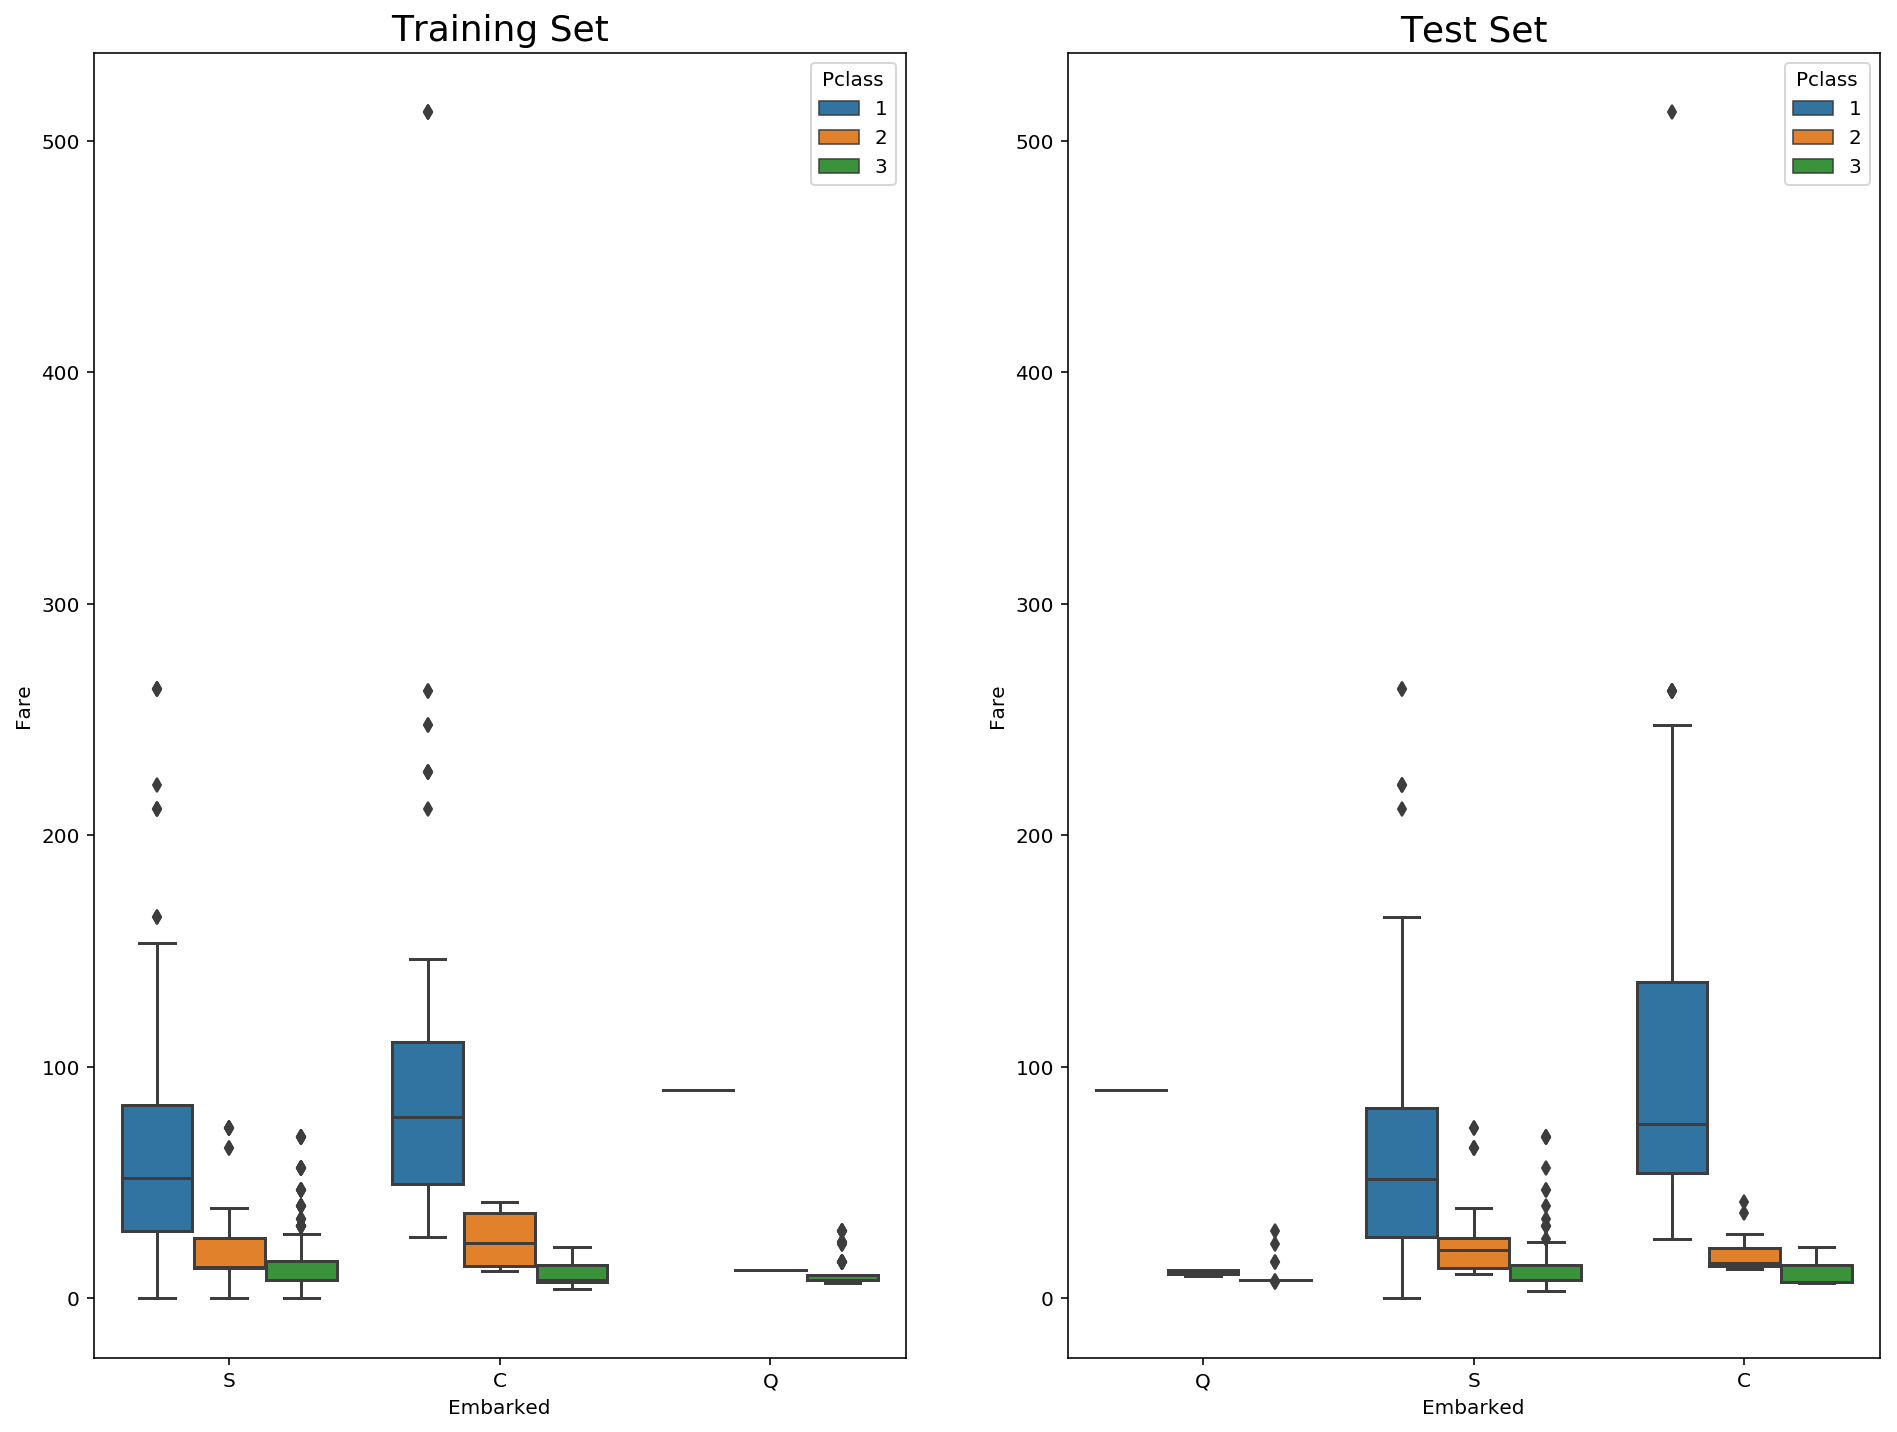

In [9]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

Aqui, em ambos treino e teste, a tarifa média mais próxima de $80 está nos valores <b> C </b> Embarked. Então, vamos preencher os valores ausentes como "C"

In [10]:
## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

### Cabin Feature
***

In [11]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


Aproximadamente 77% da feature de cabine está ausente nos dados de treinamento e 78% está ausente nos dados de teste.
Temos duas escolhas,
* podemos nos livrar de toda a feature, ou
* podemos debater um pouco e encontrar uma maneira apropriada de colocá-los em uso. Por exemplo, podemos dizer que os passageiros com registros de cabine tiveram um status socioeconômico mais alto do que outros. Também podemos dizer que os passageiros com registros de cabine eram mais propensos a serem levados em consideração ao carregar no barco.

Vamos combinar os dados de treino e teste primeiro e por enquanto atribuiremos todos os valores nulos como **"N"**

In [12]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

Todos os nomes de cabine começam com um alfabeto inglês seguido de dígitos. Parece que alguns passageiros reservaram vários quartos de cabine em seu nome. Isso ocorre porque muitos deles viajaram com a família. No entanto, todos parecem reservar com a mesma letra seguida por números diferentes. Parece que há um significado com as letras e não com os números. Portanto, podemos agrupar essas cabines de acordo com a letra do nome da cabine.

In [13]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [14]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

Agora, esses meios podem nos ajudar a determinar as cabines desconhecidas, se compararmos cada row de cabine desconhecida com as médias acima. Vamos escrever uma função simples para que possamos dar nomes de cabine com base nos meios.

In [15]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

Vamos aplicar a função <b>cabin_estimator</b> em cada valores nulos de cabine. Feito isso, separaremos o treino e o teste para continuar na modelagem.

In [16]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

In [17]:
## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

### Fare Feature
***

In [18]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


Aqui, podemos calcular a média da coluna **Fare** com todos os valores a serem preenchidos para o valor de Fare desconhecido. No entanto, essa pode não ser a melhor maneira de preencher esse valor. Podemos ser um pouco mais específicos e calcular a média dos valores em que **Pclass** é ***3***, **Sex** é ***masculino*** e **Embarked** é ***S***


In [19]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

### Age Feature
***

In [20]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


Algumas abordagens padrão para lidar com valores nulos são média, mediana e moda. No entanto, adotaremos uma abordagem diferente, pois faltam **~20% na coluna Idade**. A variável idade parece ser promissora para determinar a taxa de sobrevivência. Portanto, não seria prudente substituir os valores ausentes por mediana, média ou modo. Usaremos o modelo Random Forest Regressor de machine learning para atribuir valor ausente em vez de valor nulo. Manteremos a coluna de idade inalterada por enquanto e trabalharemos nisso na seção de engenharia de features.

# Part 3. Visualização e Relações das Features
<a id="visualization_and_feature_relations" ></a> 



## 3a. Gender e Survived
<a id="gender_and_survived"></a>
***

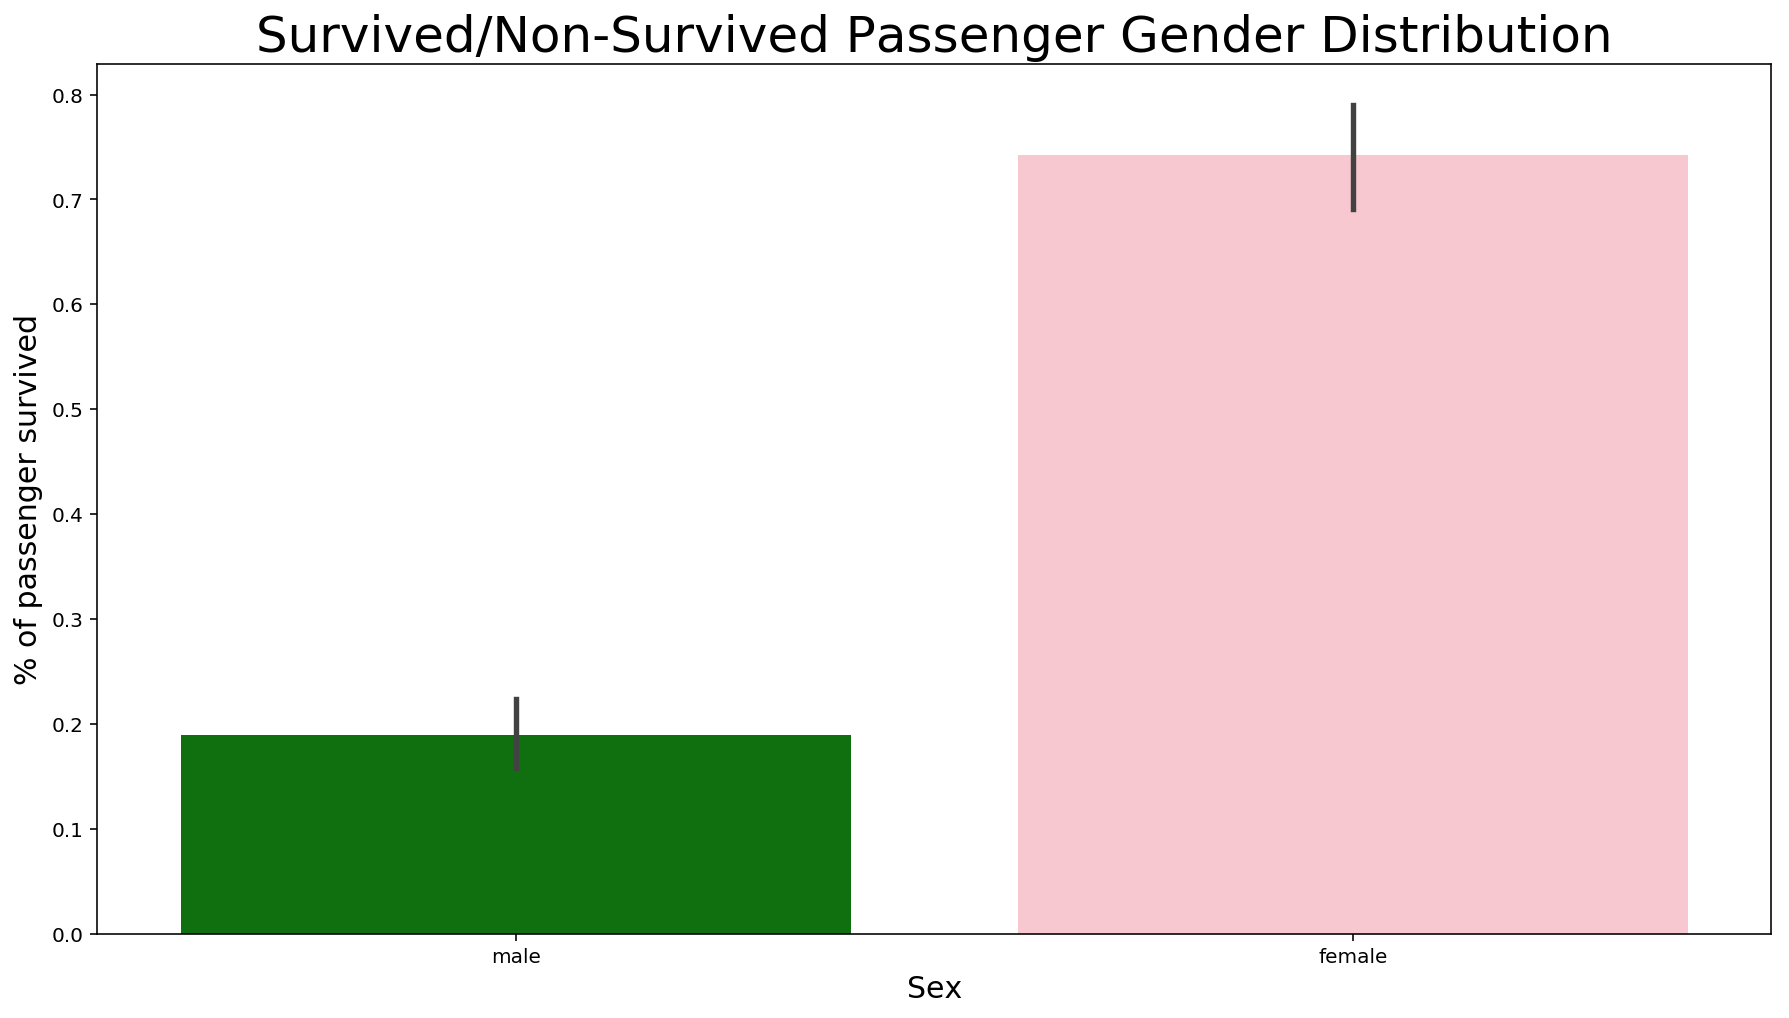

In [21]:
pal = {'male':"green", 'female':"Pink"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            palette = pal,
            linewidth=2 )
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);



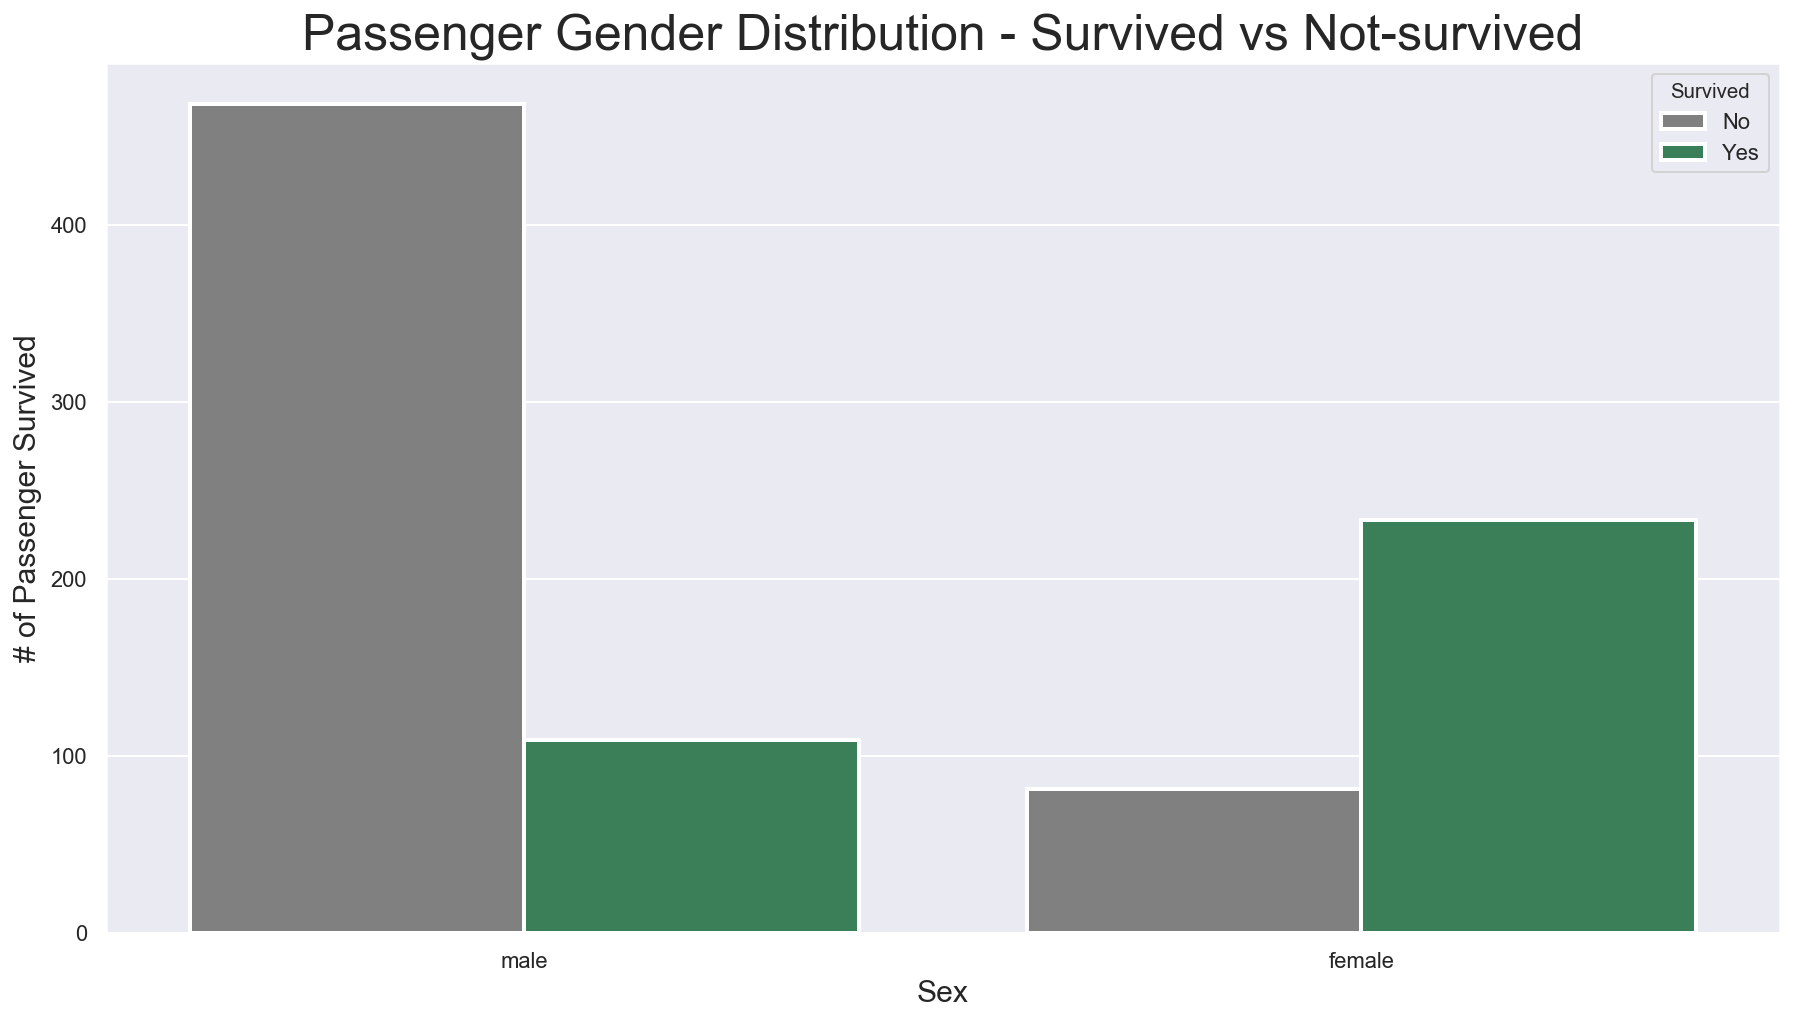

In [22]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

Esse gráfico mostra a distribuição real de passageiros masculinos e femininos que sobreviveram e não sobreviveram. Mostra que entre todas as mulheres ~230 sobreviveram e ~70 não sobreviveram. Enquanto entre os passageiros do sexo masculino ~110 sobreviveram e ~480 não sobreviveram.

## 3b. Pclass e Survived
<a id="pcalss_and_survived"></a>
***

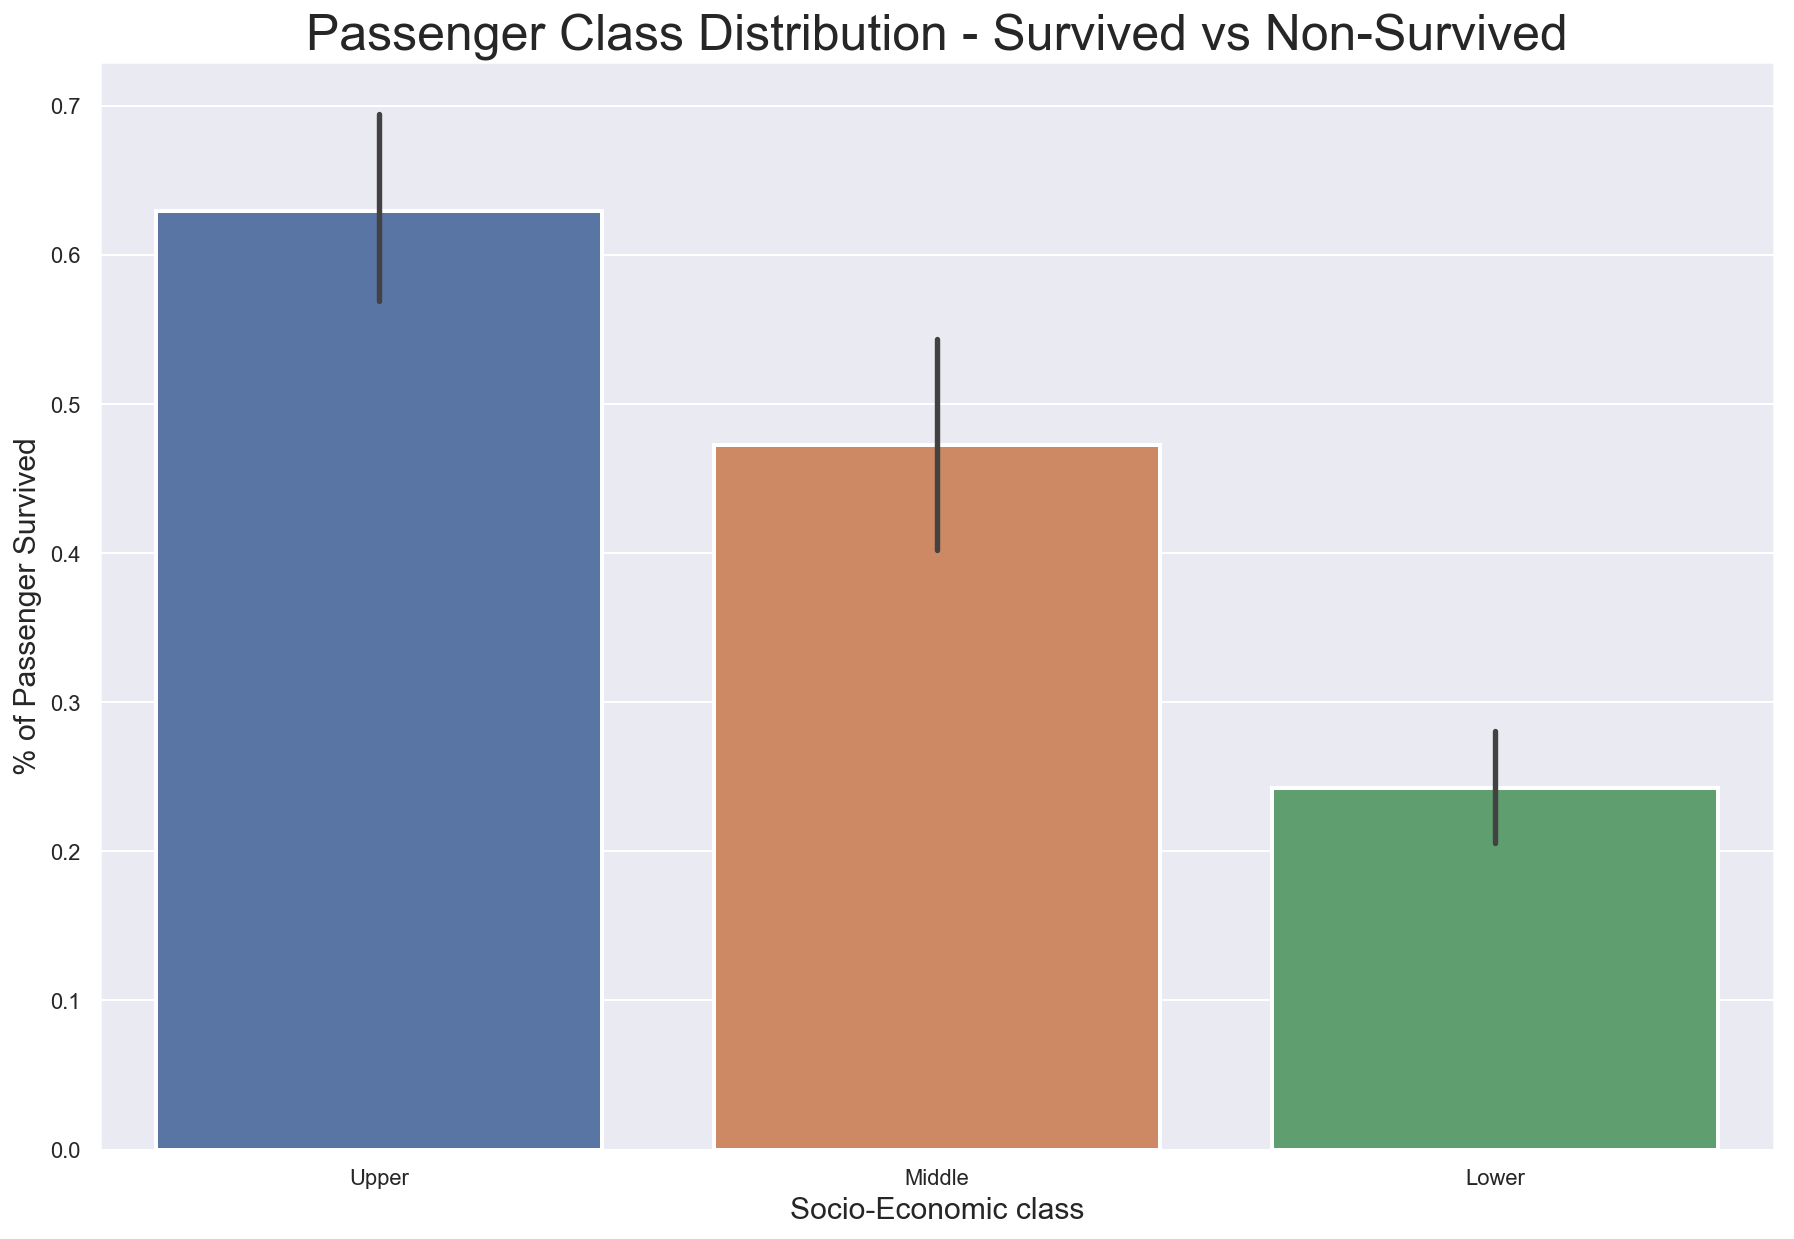

In [23]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

- Analisando...
    - ~ 63% passageiros de primeira classe sobreviveu à tragédia titanic, enquanto 
    - ~ 48% segunda classe e
    - ~ somente  24% passageiros da terceira classe sobrevivel. 



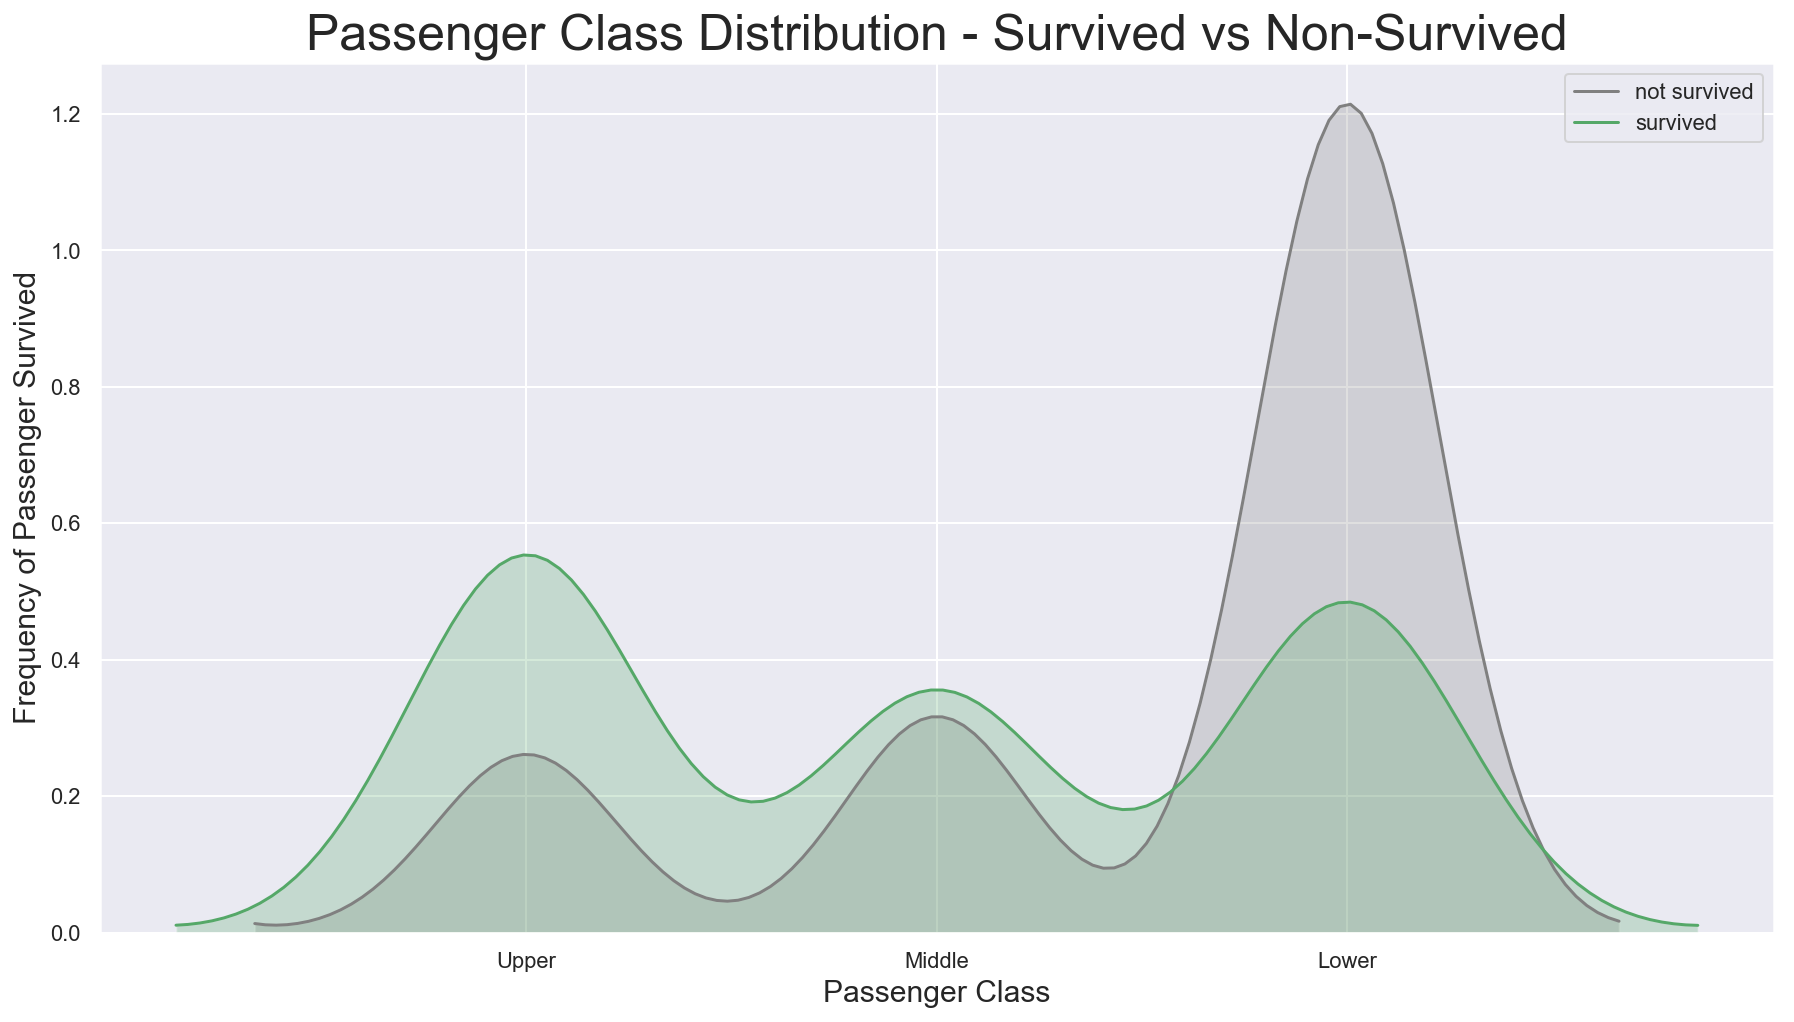

In [24]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

## 3c. Fare e Survived
<a id="fare_and_survived"></a>
***

Text(0.5, 0, 'Fare')

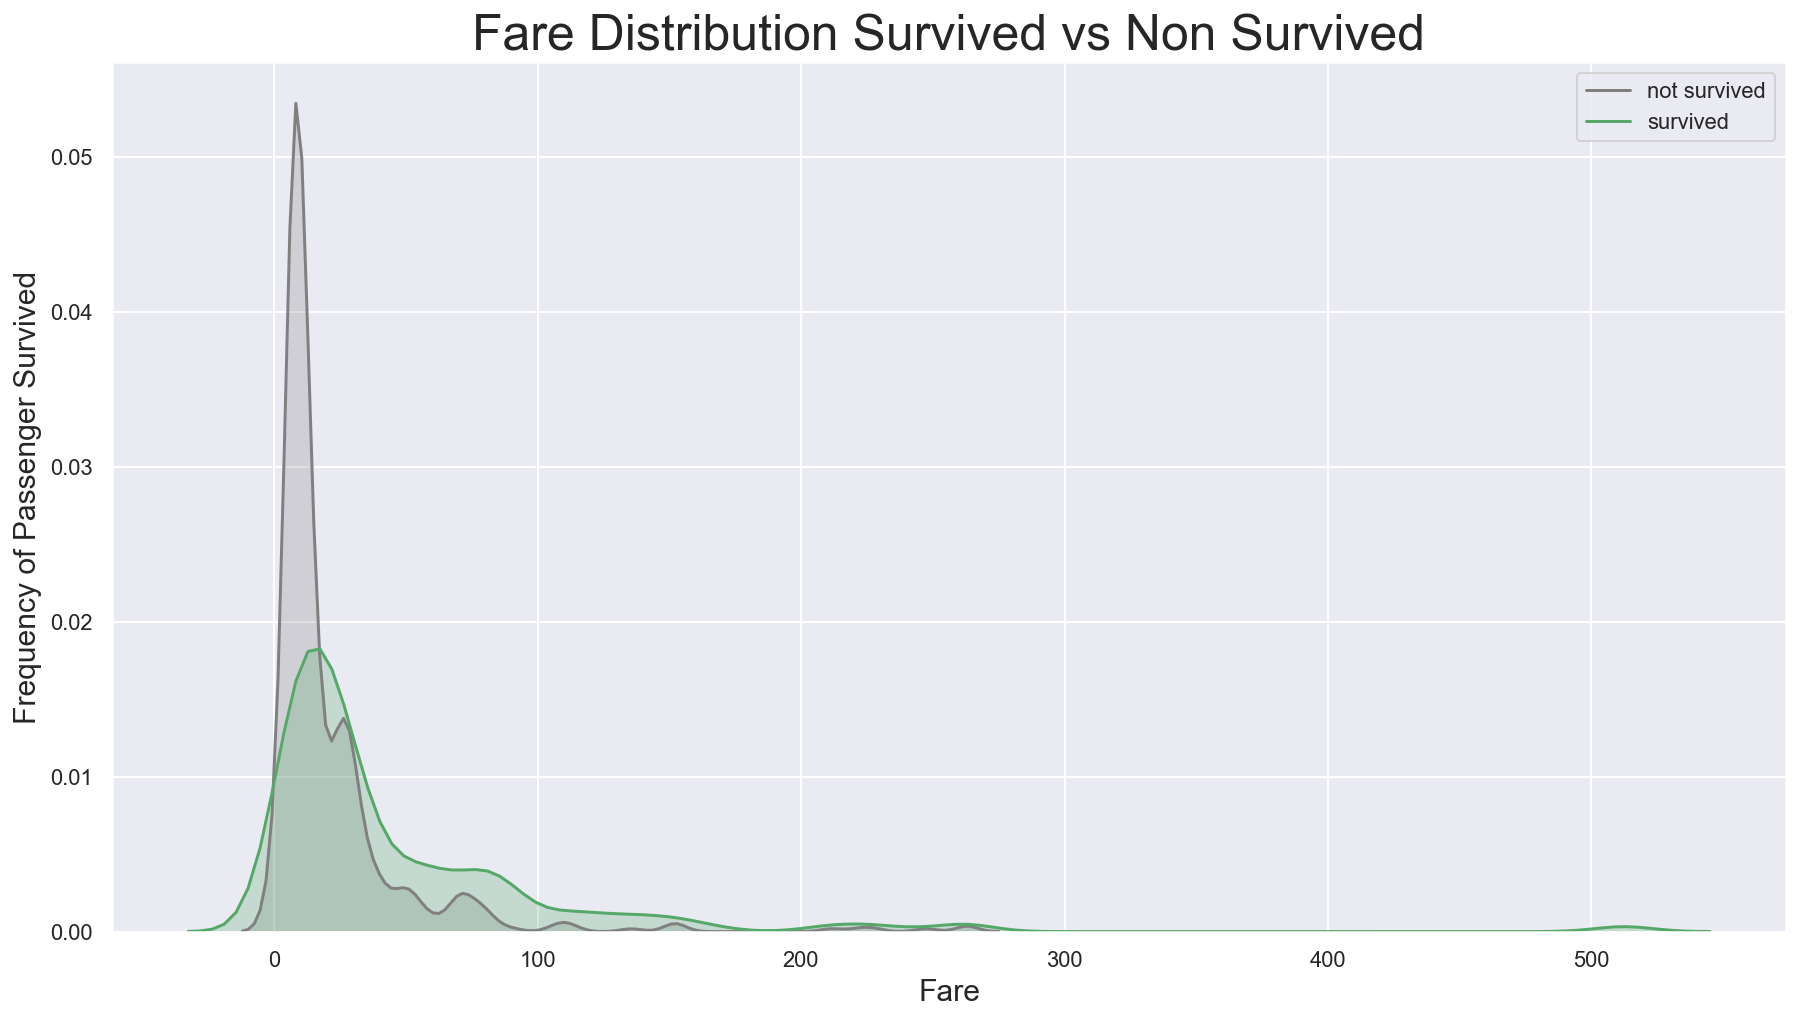

In [25]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)



Este plot mostra algo impressionante..
- O aumento na parcela abaixo de 100 dólares demostra que muitos passageiros que compraram a passagem dentro desse intervalo não sobreviveram.
- Quando a tarifa é de aproximadamente mais de 280 dólares, não há sombra cinza, o que significa que todos nessa faixa sobreviveu.

## 3d. Age e Survived
<a id="age_and_survived"></a>
***

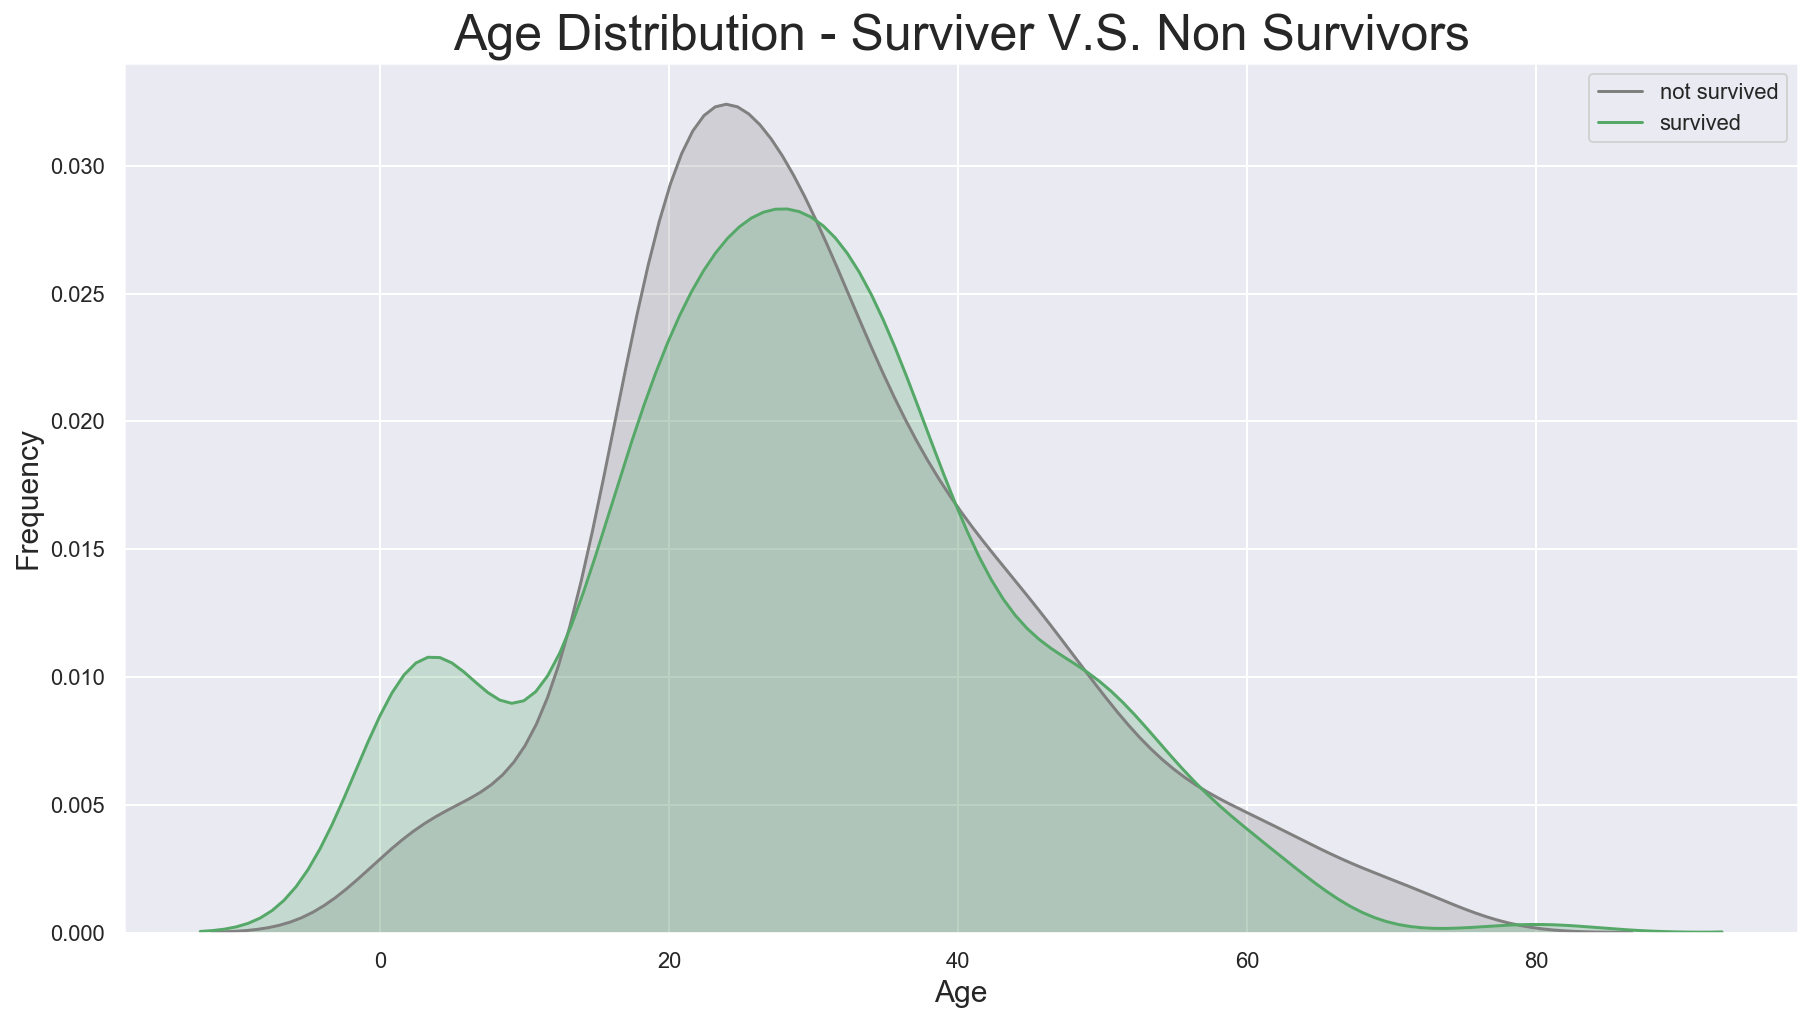

In [26]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

## 3e. Relações de Fetures combinadas
<a id='combined_feature_relations'></a>
***

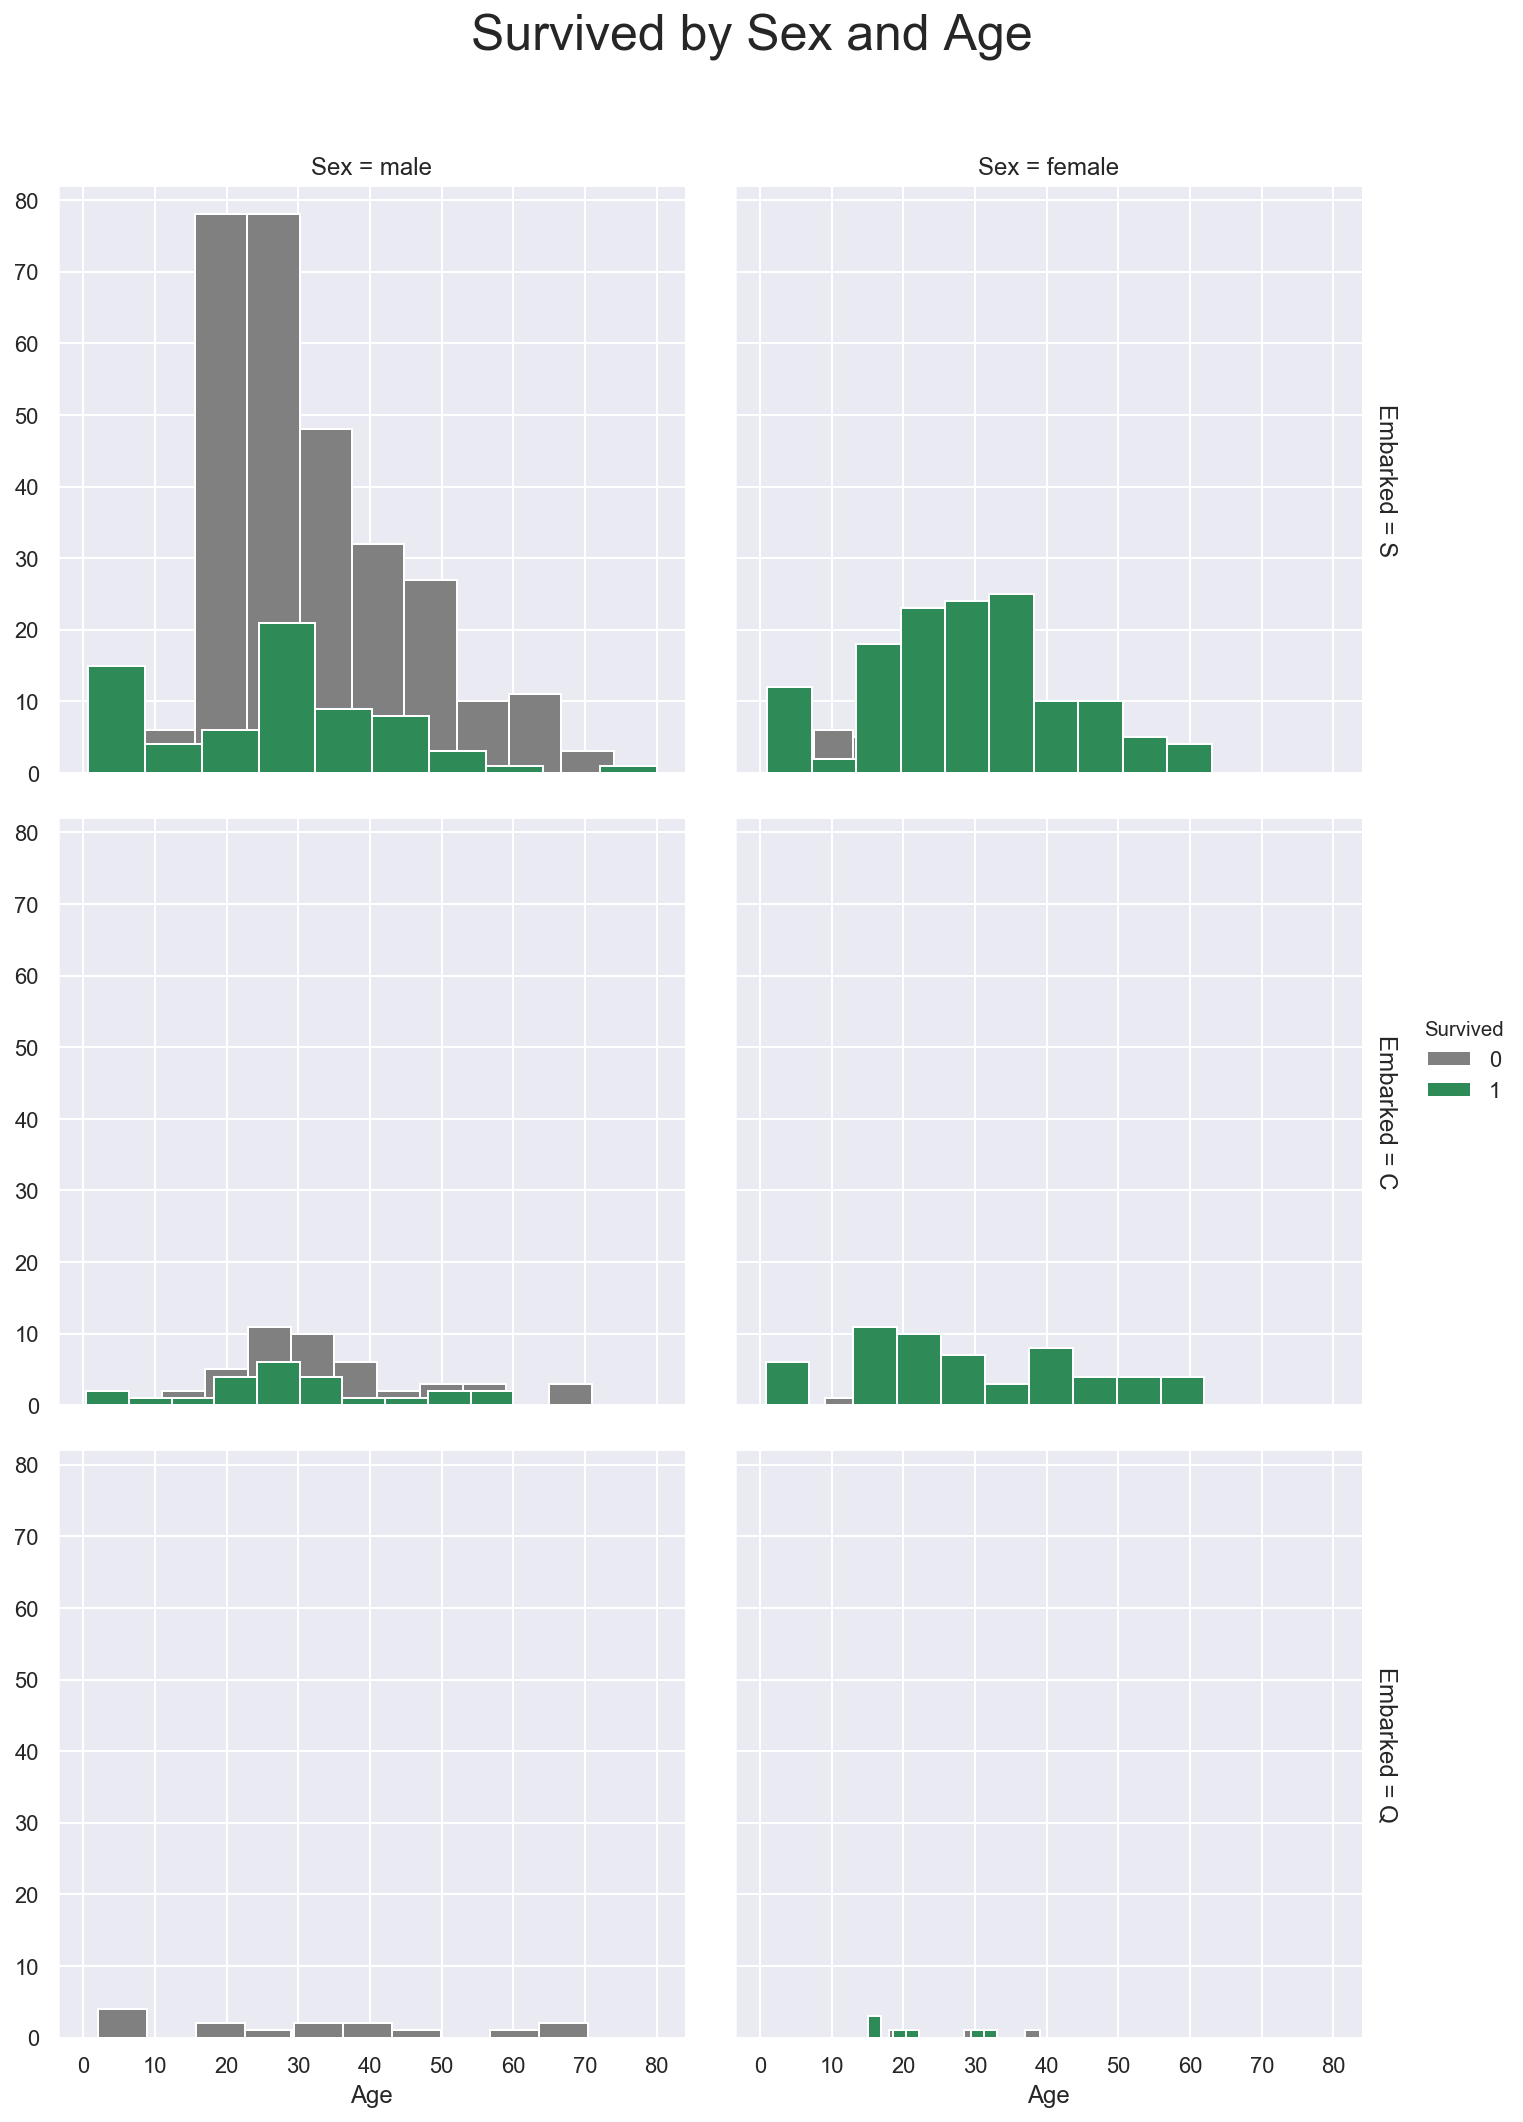

In [27]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Essa é outro facet grid atraente que ilustra o relacionamento de quatro features ao mesmo tempo. Eles são **Embarked, Age, Survived & Sex**.
* A cor ilustra o status de sobrevivência dos passageiros (verde representa sobreviveu, cinza não sobreviveu)
* A coluna representa Sexo(esquerdo sendo masculino, direito feminino)
* A linha representa Embarked(de cima para baixo: S, C, Q)

***
Agora que eu desviei o aparente, vamos ver se podemos obter algumas idéias que não são tão óbvias quanto olhamos para os dados.
* A maioria dos passageiros parece estar embarcada em Southampton(S).
* Mais de 60% dos passageiros embarcados em Southampton não sobreviveu.
* Mais de 60% dos passageiros embarcados em Cherbourg (C) sobreviveu.
* Praticamente todos os homens que embarcaram em Queenstown (Q) não sobreviveram. 
* Poucas mulheres embarcadas em Queenstown, no entanto, a maioria delas sobreviveu.

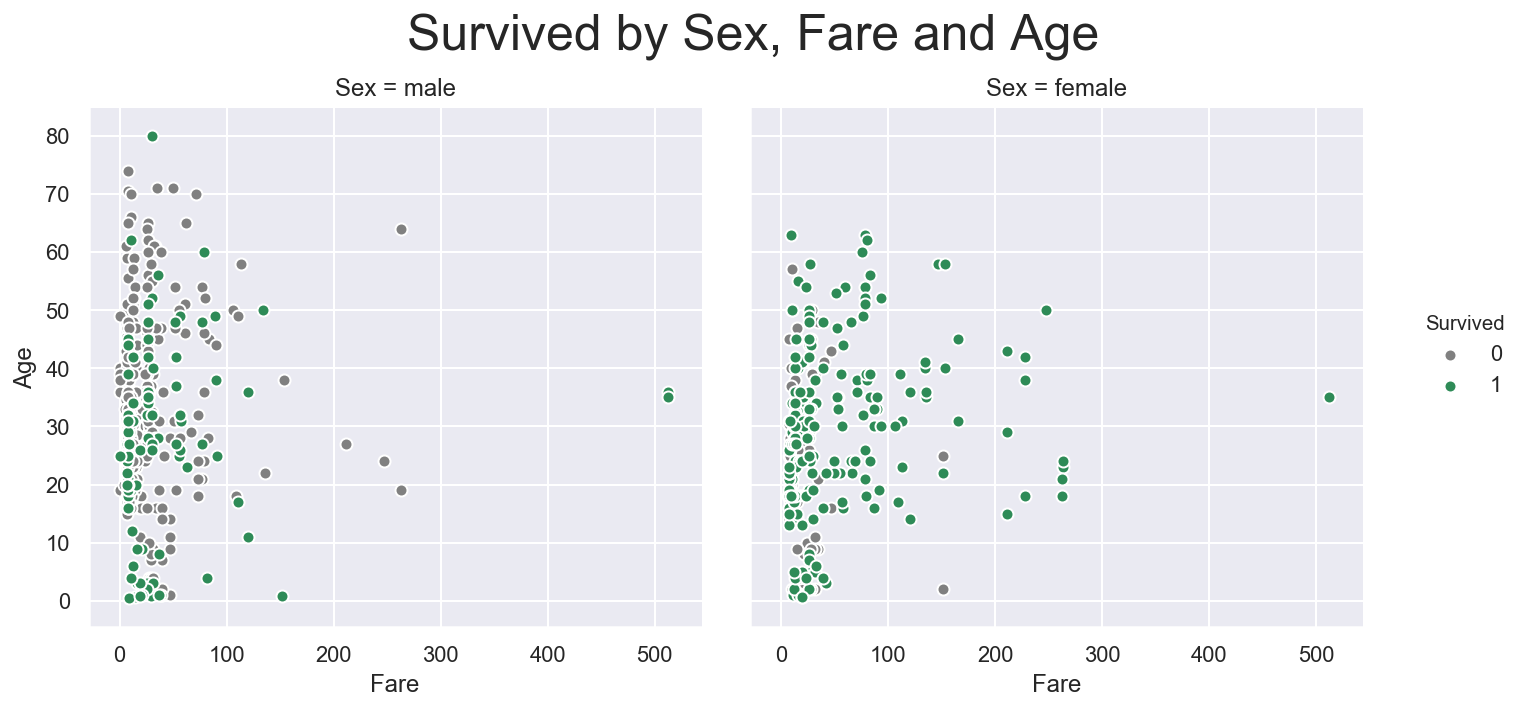

In [28]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

Esse grid revela algumas idéias interessantes.

* O facet grid acima demonstra claramente os três outliers com Fare superior a \$500. Neste ponto, acho que estamos bastante confiantes de que esses discrepantes devem ser excluídos.
* A maioria dos passageiros estava na faixa de \$100 Fare.

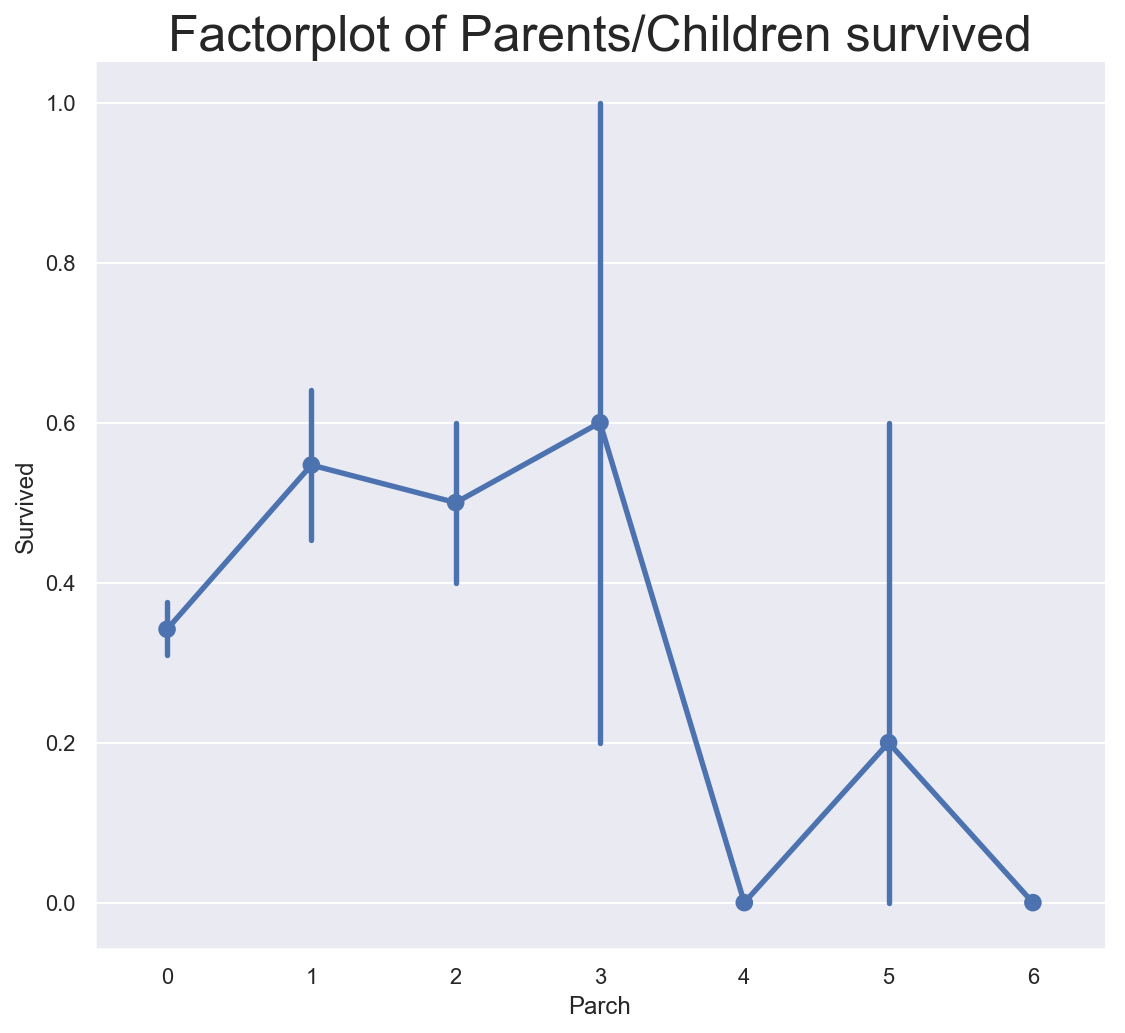

In [29]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

**Passageiros que viajaram em grandes grupos com pais/filhos tiveram menor taxa de sobrevivência do que outros passageiros.**

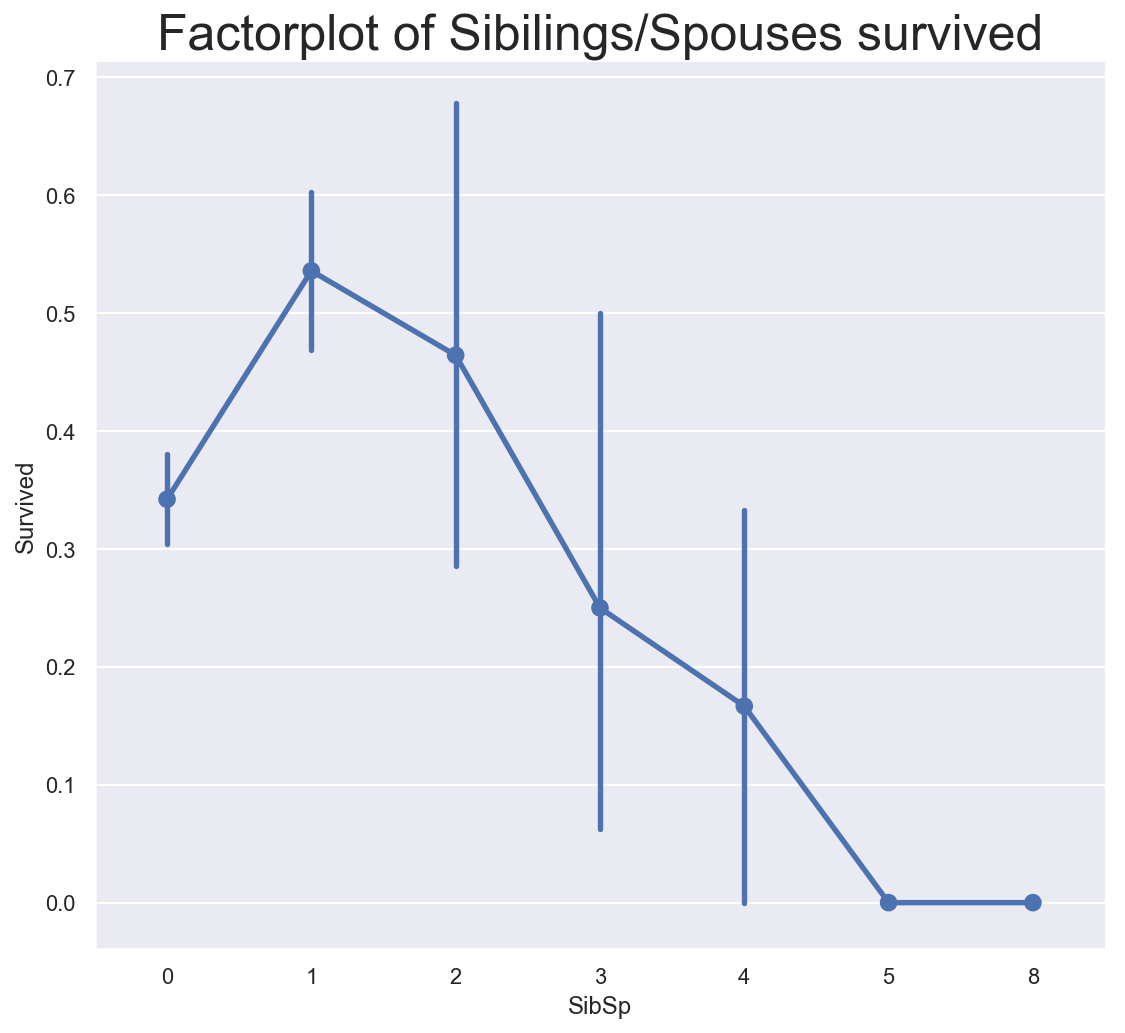

In [30]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

**Enquanto, os passageiros que viajaram em pequenos grupos com irmãos/cônjuges tiveram mais taxa de sobrevivência do que outros passageiros.**

In [31]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Part 4: Overview Estatístico
<a id="statisticaloverview"></a>
***

![title](https://cdn-images-1.medium.com/max/400/1*hFJ-LI7IXcWpxSLtaC0dfg.png)

**informações do treino**

In [32]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [33]:
train[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [34]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [35]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


Reuni um pequeno resumo da visão estatística acima. Vamos ver o que são ...
- Este conjunto de dados possui 891 primas e 9 colunas.
- apenas 38% dos passageiros sobreviveram durante essa tragédia.
- apenas 38% dos passageiros sobreviveram durante essa tragédia.
- ~ 74% das mulheres sobreviveram, enquanto apenas 19% dos homens sobreviveram.
- ~ 63% dos passageiros da primeira classe sobreviveram, enquanto apenas 24% dos passageiros da classe baixa sobreviveram.

## 4a. Matrix de Correlação e Heatmap
<a id="heatmap"></a>
***
### Correlações

In [36]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


**Sexo é a característica correlacionada mais importante com *Survived*, seguida por Pclass.**


In [37]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

**A quadratura da correlação de fetures não apenas fornece correlações positivas, mas também amplifica os relacionamentos.**

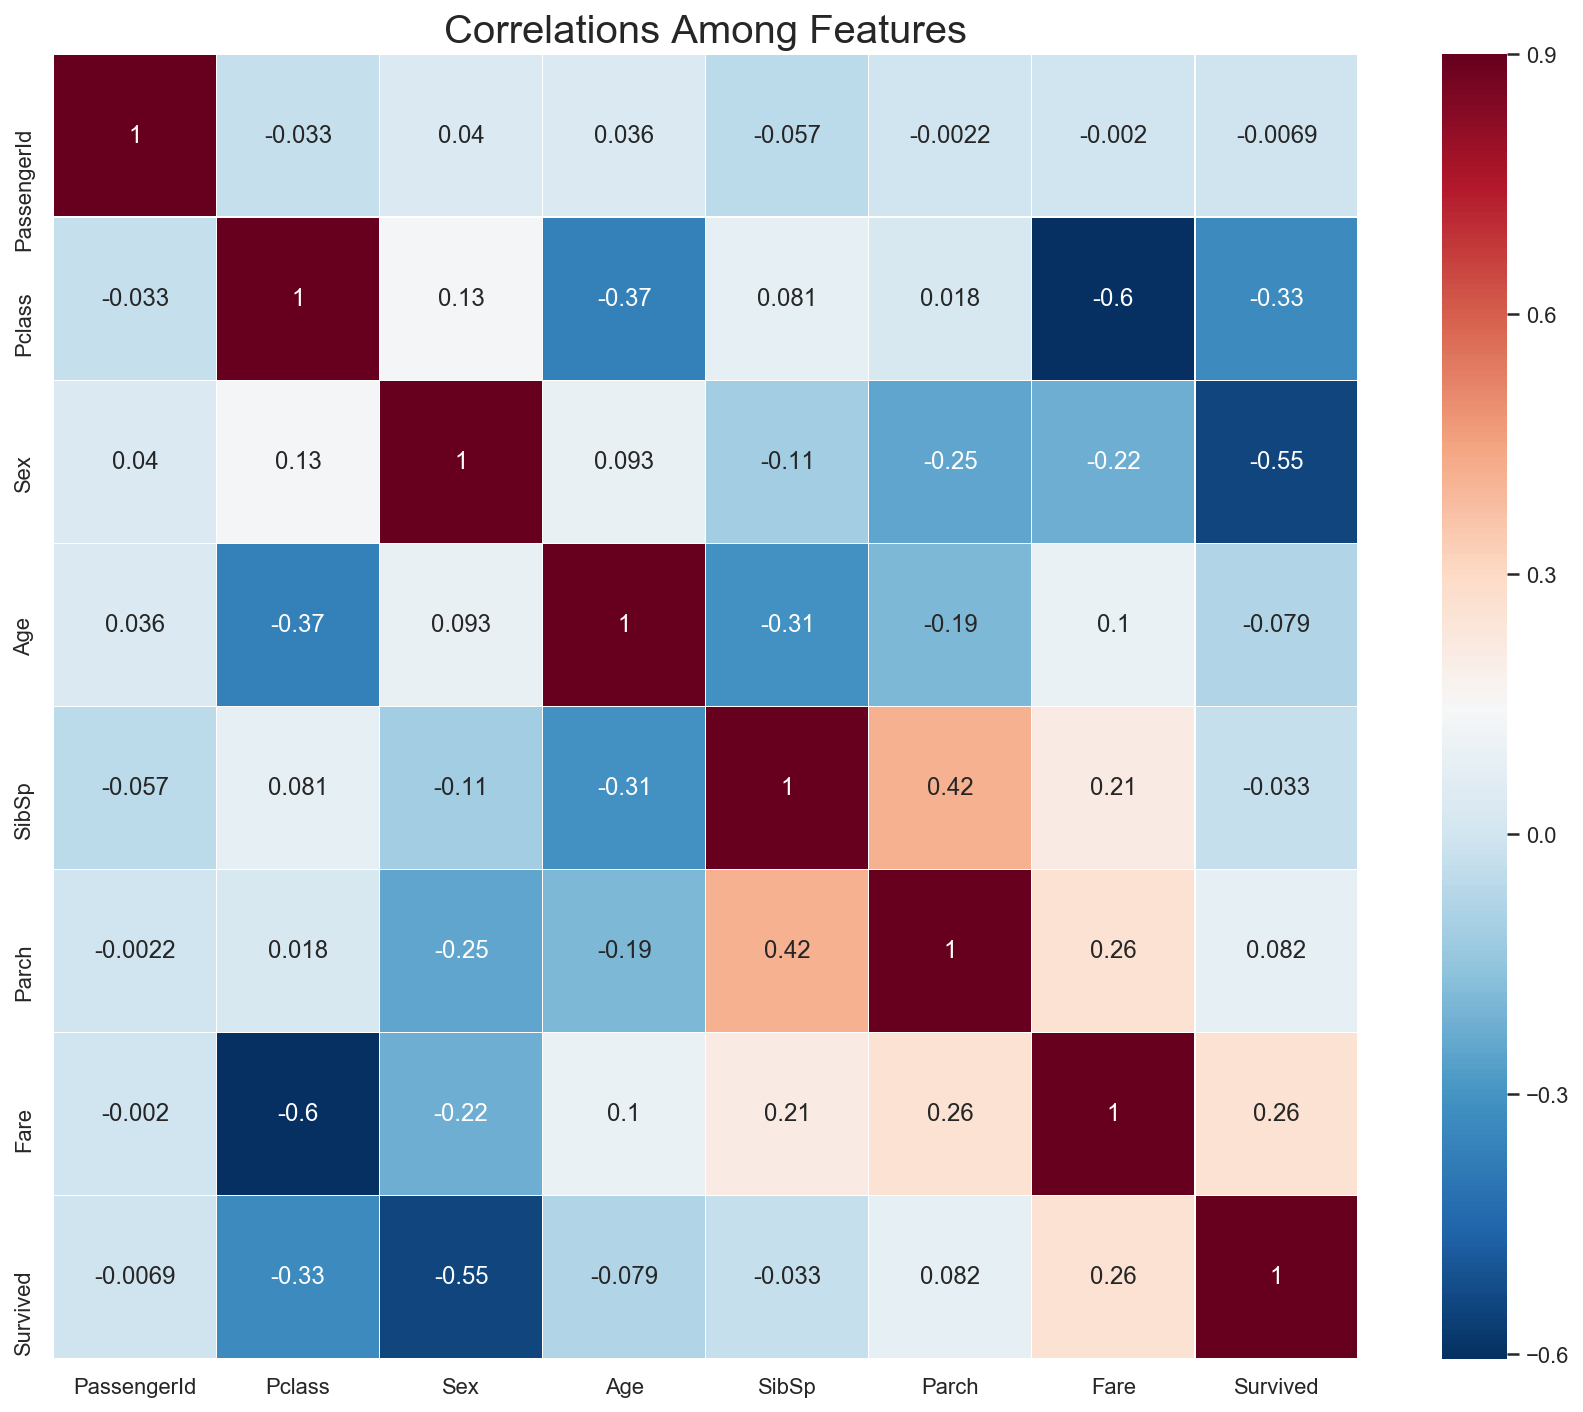

In [38]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

#### Positive Correlation Features:
- Fare e Survived: 0.26

#### Negative Correlation Features:
- Fare e Pclass: -0.6
- Sex e Survived: -0.55
- Pclass e Survived: -0.33

# Part 5: Feature Engineering
<a id="feature_engineering"></a>
***
Engenharia de feature é exatamente o que parece. Às vezes, queremos criar features extras com as features que temos, às vezes queremos remover features semelhantes. Engenharia de features é a palavra simples para fazer tudo isso. É importante lembrar que criaremos novas features de maneira a não causar **multicolinearidade (quando houver uma relação entre variáveis independentes)** quando ocorrer.

## name_length
***Criando uma nova feature "name_length" que terá a contagem de letras de cada nome***

In [39]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 


## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## title
**Obtendo o título de cada nome como uma nova feature.**

In [40]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

In [41]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

## family_size
***Criando uma nova feature contendo o tamanho da familia.***

In [42]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [43]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [44]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

## is_alone

In [45]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

## ticket

In [46]:
train.Ticket.value_counts().sample(10)

A/5. 851           1
2693               1
248723             1
SC/AH Basle 541    1
373450             1
330979             1
358585             2
C 4001             1
236853             1
31418              1
Name: Ticket, dtype: int64

In [47]:
len(train.Ticket)

888

In [48]:
len(train.Ticket.unique())

680

Está dificil encontrar um padrão para o ticket e como temos mais de 75% dos dados unicos, por hora é melhor remover essa feature até termos algo melhor a se fazer com ela.

In [49]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

## calculated_fare

In [50]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

Algumas pessoas viajaram em grupos como família ou amigos. Parece que a coluna Fare manteve um registro da tarifa total em vez da tarifa individual do passageiro; portanto, a tarifa calculada será mais útil nessa situação.


In [51]:
train.Fare.describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

## fare_group

In [52]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

Fare group foi baseado em <i>calculated_fare</i>. está discretização pode ajudar ainda mais a nossa causa.

## PassengerId

In [53]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

## Criando variáveis Dummy

Você pode estar se perguntando o que é uma variável Dummy?

A variável Dummy é uma importante **etapa do pré-processamento em aprendizado de máquina**. Muitas vezes, as variáveis Categóricas são features importante, que pode ser a diferença entre um bom modelo e um ótimo modelo. Ao trabalhar com um dataset, havendo um valor significativo, por exemplo, "masculino" ou "feminino" em vez de 0's e 1's é mais intuitivo para nós. No entanto, as máquinas não entendem o valor dos valores categóricos, por exemplo, neste conjunto de dados temos sexo masculino ou feminino, os algoritmos não aceitam variáveis ctegóricas como entrada


In [54]:
train.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,name_length,nLength_group,title,family_size,family_group,is_alone,calculated_fare,fare_group
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.25,G,S,0,23,medium,Mr,2,small,0,3.625,Very_low


In [55]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

## age

Como prometi antes, usaremos o Random Forest Regressornesta seção para prever os valores de idade ausentes. Vamos ver quantos valores faltantes temos agora

In [56]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [58]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df, model=None):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    if model:
        rfr = model
    else:
        rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
        rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df, rfr

## Implementing the completing_age function in both train and test dataset. 
#completing_age(train)
#completing_age(test);

a, model = completing_age(train)
b, model = completing_age(test, model)

Vamos dar uma olhada no histograma da coluna da idade.

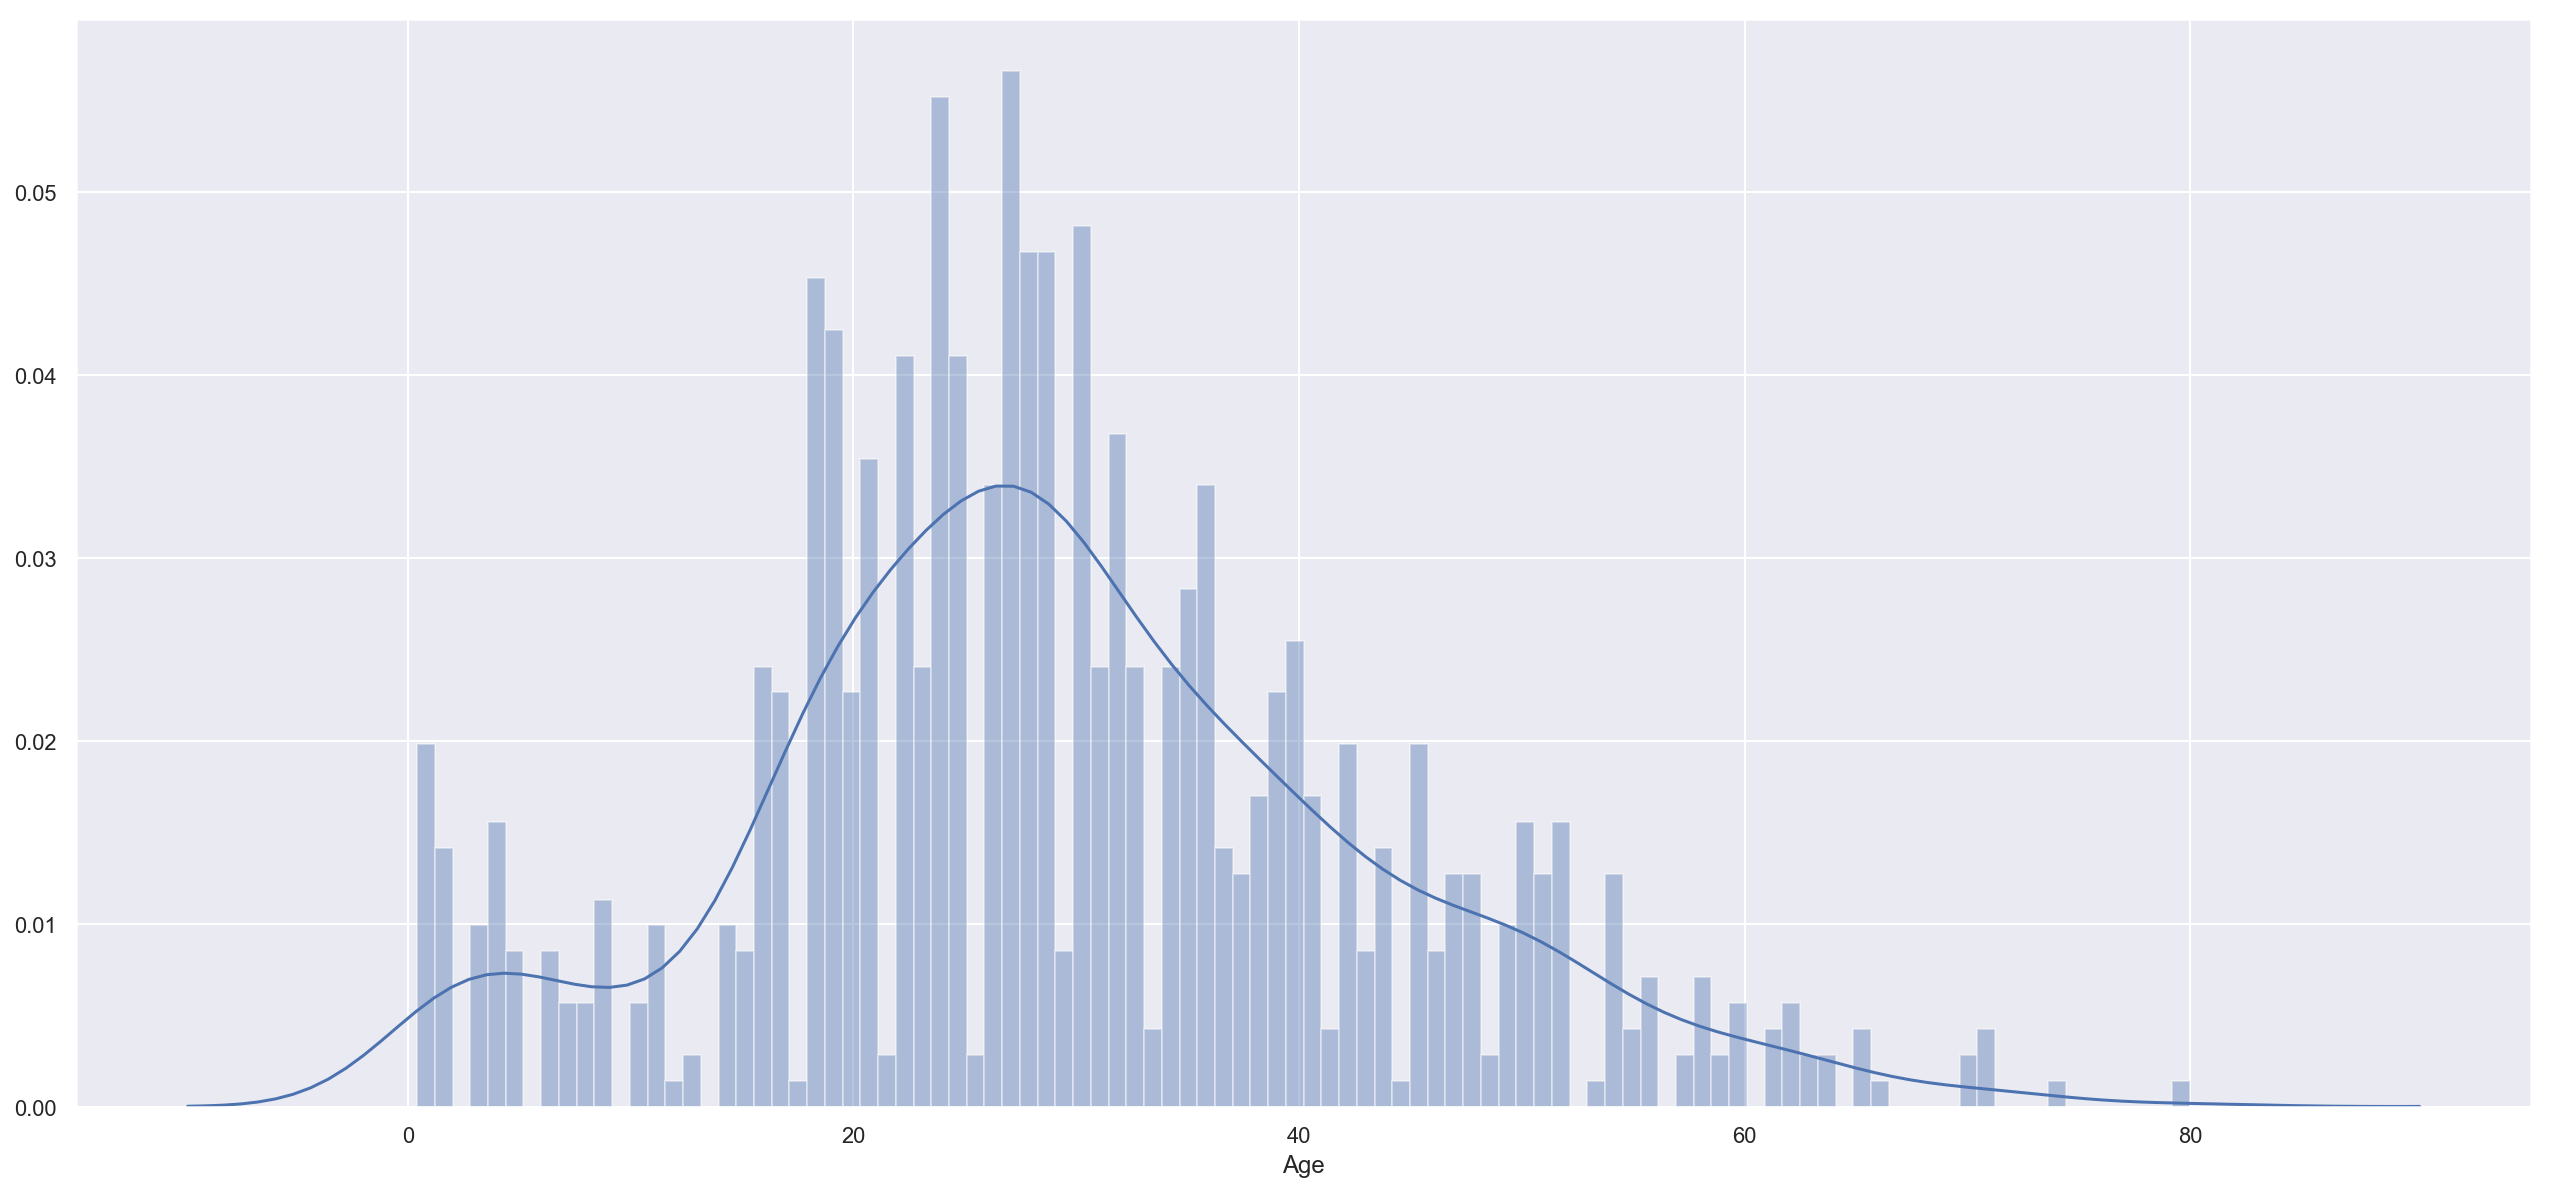

In [61]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

## age_group
Podemos criar um novo recurso agrupando a coluna "Idade"

In [62]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age', axis=1, inplace=True)"

# Part 6: Tarefas de pré-modelagem
## 6a. Separando variáveis dependentes e independentes
<a id="dependent_independent"></a>

***
Antes de aplicar qualquer modelo de aprendizado de máquina, é importante separar variáveis dependêntes e independentes. Nossa variável dependente ou variável de destino é algo que estamos tentando encontrar, e nossa variável independente são os recursos que usamos para encontrar a variável dependente. A maneira como usamos o algoritmo de aprendizado de máquina em um conjunto de dados é que treinamos nosso modelo de aprendizado de máquina especificando variáveis independêntes e variáveis dependêntes.

In [63]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]


#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

## 6b. Splitting os dados de treino
<a id="split_training_data" ></a>
***
Existem várias maneiras de dividir dados. As mais comuns são...
* train_test_split.
* cross_validation.

Separamos features dependêntes e independêntes; Separamos os dados de treino e teste. Então, por que ainda precisamos dividir nossos dados de treinamento? Se você está curioso sobre isso, eu tenho a resposta. Para esta competição, quando treinamos os algoritmos de aprendizado de máquina, usamos parte do conjunto de treinamento geralmente dois terços dos dados do treino. Uma vez que nosso algoritmo usa 2/3 dos dados do treino, começamos a testar nossos algoritmos usando os dados restantes. Se o modelo tiver um bom desempenho, despejamos nossos dados de teste nos algoritmos para prever e enviar para produção. O código abaixo basicamente divide os dados do treino em 4 partes, **X_train**, **X_test**, **y_train**, **y_test**.  
* **X_train** e **y_train** primeiro é usado para treinar o algoritmo. 
* então, **X_test**  é usado no algoritmo treinado para predizer o **target**.
* Uma vez que nós temos o **target**, nós os comparamos com o **y_test**

Ao comparar o **target** do modelo com **y_test**, podemos determinar se nossos algoritmos estão funcionando bem ou não. À medida que comparamos, usamos a matriz de confusão para determinar diferentes aspectos do desempenho do modelo.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

## 6c. Feature Scaling
<a id="feature_scaling" ></a>
***

Feature Scaling é um conceito importante dos modelos de aprendizado de máquina. Muitas vezes, um conjunto de dados contém features que variam muito em magnitude e unidade. Para alguns modelos de aprendizado de máquina, isso não é um problema. No entanto, para muitos outros, é um grande problema. Muitos algoritmos de aprendizado de máquina usam distâncias euclidianas para calcular a distância entre dois pontos, isso é um problema. Vejamos novamente uma amostra do conjunto de dados **train** abaixo.

In [66]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
381,1,1.0,0,0,2,0,5.247233,0,1,0,...,0,0,0,0,1,0,0,0,0,0
189,0,36.0,1,0,0,1,7.895800,0,0,1,...,0,0,1,0,0,0,0,0,0,0
748,0,19.0,1,1,0,0,26.550000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44,1,19.0,0,0,0,1,7.879200,0,1,0,...,0,0,0,0,0,0,0,0,0,0
199,0,24.0,0,0,0,1,13.000000,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Aqui **Age** e **Calculated_fare** são muito maiores em magnitude em comparação com outras features de aprendizado de máquina. Isso pode criar problemas, pois muitos modelos de aprendizado de máquina ficarão confusos ao pensar que **Age** e **Calculated_fare** têm peso maior que outros recursos. Portanto, precisamos fazer o dimensionamento de recursos para obter um melhor resultado.
<ul>
    <li><b>MinMaxScaler</b>-Escala os dados usando os valores max e min para que eles se ajustem entre 0 e 1.</li>
    <li><b>StandardScaler</b>-Escala os dados para que tenham média 0 e variação de 1.</li>
    <li><b>RobustScaler</b>-Escala os dados semelhante ao Standard Scaler, mas utiliza a mediana e as escalas usando o intervalo inter quartil, de modo a evitar problemas com grandes valores discrepantes (outliers).</b>
 </ul>

<h3><font color="$5831bc" face="Comic Sans MS">Before Scaling</font></h3>

In [67]:
headers = X_train.columns 

X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000,1,0,0,1,33.5000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000,1,0,0,1,26.5500,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
849,41.678,0,1,0,0,44.5521,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
433,17.000,1,0,0,1,7.1250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [68]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)
## transforming "test_x"
X_test = sc.transform(X_test)

## transforming "The testset"
test = sc.transform(test)

<h3><font color="#5831bc" face="Comic Sans MS">After Scaling</font></h3>

In [69]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.257544,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.250224,-0.116841,-0.309743,-0.101015,5.223573,-0.286299,-0.196116
1,1.116403,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,2.222611,-0.250224,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.196116
2,0.879474,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,2.222611,-0.250224,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.196116
3,-0.880593,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.250224,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.196116
4,-0.809272,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.449921,-0.250224,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.196116


You can see how the features have transformed above.

# Part 7: Modelagem dos dados
<a id="modelingthedata"></a>


## 7a.Logistic Regression
<a id="logistic_regression"></a>

In [70]:
train.calculated_fare = train.calculated_fare.astype(float)

In [71]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.7925


<h2><font color="#5831bc" face="Comic Sans MS">Avaliando o modelo</font></h2>
Enquanto tentamos avaliar o modelo, queremos nos concentrar em algumas coisas.

<ul>
    <li>Quais são as features mais importantes (relativamente) de um projeto? (<b> Importância relativa das features </b>)</li>
    <li>Quais features têm o maior impacto no sucesso do projeto? (<b> Importância da permutação </b>) </li>
    <li>Como as mudanças nessas façanhas afetam o sucesso do projeto? (<b> Dependências parciais </b>) </li>
</ul>

<h3>Explicando os resultados do modelo.</h3>
<ul>
    <li>Quão bem é o modelo ?</li>
    <li>Quais são as features mais importantes ?</li>
</ul>

<h3>Introdução à Matriz de Confusão</h3>

Então, qual é o accuracy score? O que isso nos diz?

Apresentando <b>matrix de confusão</b>, uma tabela que <b> descreve o desempenho de um modelo de classificação </b>. Usamos o modelo de classificação usando dados em que já sabemos o resultado real e o comparamos com o modelo previsto. Matriz de Confusão nos diz quantos o nosso modelo previu correta e incorretamente em termos de classes de resultados binários / múltiplos. Por exemplo, em termos desse conjunto de dados, nosso modelo está tentando classificar se o passageiro sobreviveu ou não. Vamos nos apresentar algumas das terminologias da matriz de confusão.


<ul style="list-style-type:square;">
    <li><b>True Positive</b></li>
    <li><b>True Negative</b></li>
    <li><b>False Positive</b></li>
    <li><b>False Negative</b></li>
</ul>

Vamos apresentar a matriz de confusão para o conjunto de dados do titanic.

Confusion matrix, without normalization
[[149  28]
 [ 33  84]]
Normalized confusion matrix
[[0.84 0.16]
 [0.28 0.72]]


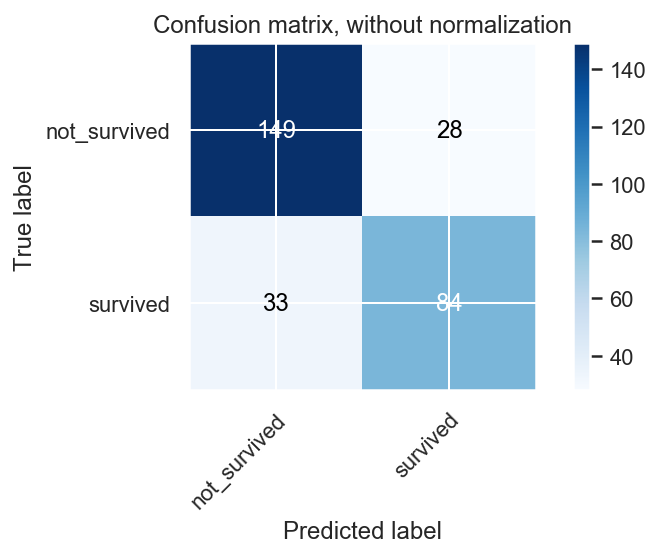

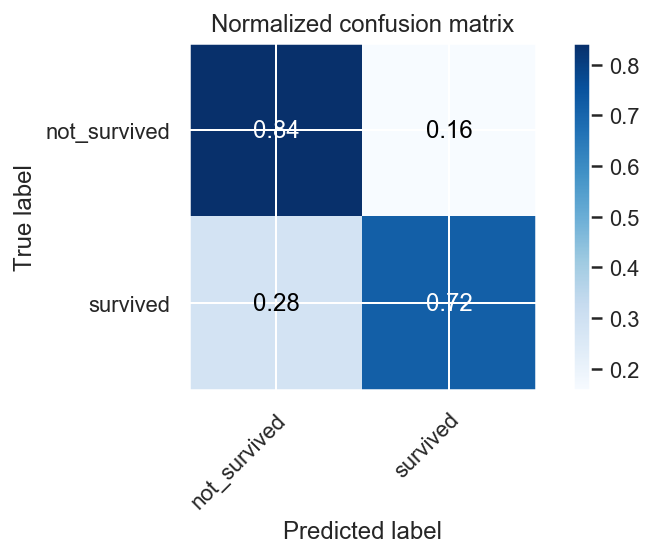

In [72]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       177
           1       0.75      0.72      0.73       117

   micro avg       0.79      0.79      0.79       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



 Recursos: 
 * [Confusion Matrix](https://www.youtube.com/watch?v=8Oog7TXHvFY)
### Under-fitting & Over-fitting: 
Então, nós temos nosso primeiro modelo e sua pontuação. Mas como garantir que nosso modelo esteja funcionando bem. Nosso modelo pode estar com  overfitting ou underfitting. De fato, para aqueles que não sabem o que é overfitting e underfitting, vamos descobrir.

![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/fittings.jpg)

Como você pode ver no gráfico acima. **Underfitting** é quando o modelo falha em capturar aspectos importantes dos dados e, portanto, apresenta mais bias e desempenha mal. Por outro lado, **Overfitting** é quando o modelo executa muito bem nos dados de treinamento, mas apresenta um desempenho ruim no conjunto de validação ou nos conjuntos de testes. Essa situação também é conhecida por ter menos viés, mas mais variação, além de apresentar um desempenho ruim. Idealmente, queremos configurar um modelo com bom desempenho, não apenas nos dados de treinamento, mas também nos dados de teste. É aqui que entra o **bias-variance tradeoff**. Quando temos um modelo que se ajusta demais, significando menos viés e mais variância, introduzimos algum viés em troca de ter muito menas variâncias. Uma tática específica para essa tarefa são os modelos de regularização (Ridge, Lasso, Elastic Net).

Esses modelos são construídos para lidar com a troca de viés e variância. Este [kernel](https://www.kaggle.com/dansbecker/underfitting-and-overfitting) explica bem este tópico. Além disso, a tabela a seguir fornece uma imagem mental de onde queremos que nossos modelos estejam.
![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Idealmente, queremos escolher um ponto ideal onde o modelo tenha um bom desempenho nos conjuntos de treinamento, validação e teste. À medida que o modelo se torna complexo, o viés diminui, a variação aumenta. No entanto, a parte mais crítica são as taxas de erro. Queremos que nossos modelos estejam na parte inferior dessa forma **U** em que a taxa de erro seja menor. Esse ponto ideal também é conhecido como **Optimum Model Complexity (OMC).**

Agora que sabemos o que queremos em termos de under-fitting e over-fitting, vamos falar sobre como combatê-los.

como combater over-fitting?
<ul>
    <li>Simplifique o modelo usando menos parâmetros.</li>
    <li>Simplifique o modelo alterando os hiperparâmetros.</li>
    <li>Introduzir modelos de regularização. </li>
    <li>Usar mais dados de treino. </li>
    <li>Obter mais dados ( e obter dados com uma melhor qualidade). </li>
    </ul>

<h1>AUC e ROC Curve</h1>

0.8349509874933605


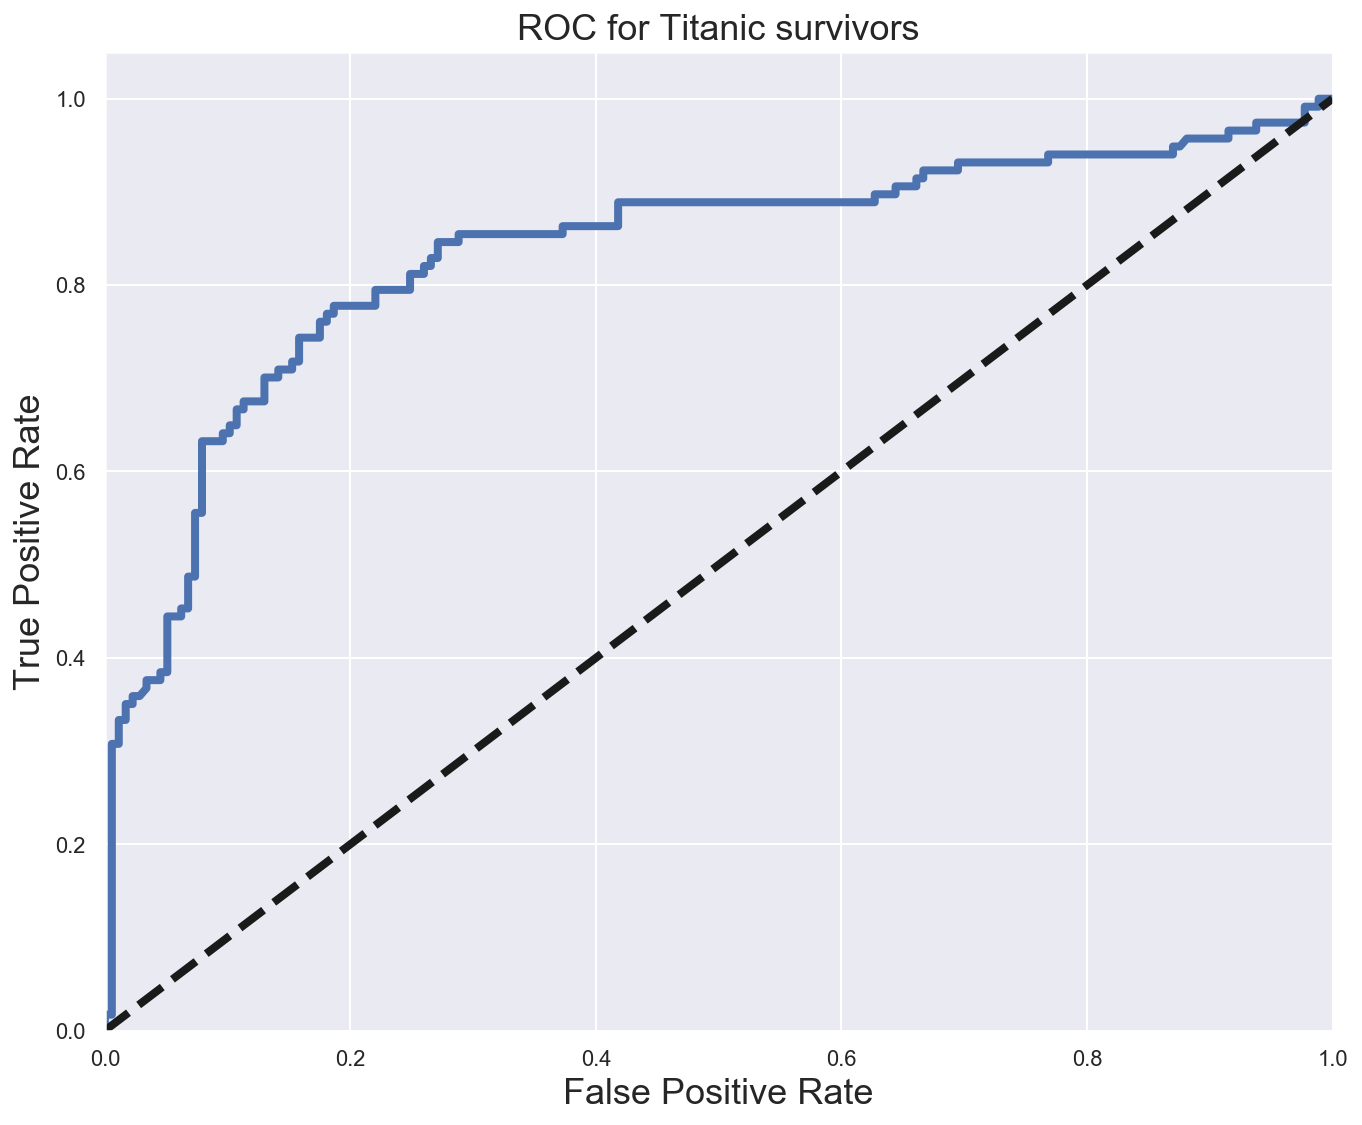

In [74]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

## Using Cross-validation:
Pros: 
* Ajuda a reduzir a variância. 
* generaliza as predições. 


In [75]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.82 0.85 0.81 0.85 0.83 0.82 0.8  0.86 0.82 0.82]
Mean Cross-Validation accuracy score: 0.82748


## Grid Search em Logistic Regression
* o que é grid search? 
* Quais são seus pros e contras?

**Gridsearch** é um conceito simples, mas uma técnica eficaz em Machine Learning. A palavra **GridSearch** representa o fato de que estamos procurando parâmetros otimos sobre uma "grade". Esses parâmetros ideais também são conhecidos como **Hiperparâmetros**. **Os hiperparâmetros são parâmetros do modelo que são definidos antes de ajustar o modelo e determinam o comportamento do modelo.**. Por exemplo, quando escolhemos usar regressão linear, podemos decidir adicionar uma penalidade à função de perda, como Ridge ou Lasso. Essas penalidades exigem que alfa específico (a força da técnica de regularização) seja definido com antecedência. Quanto maior o valor de alfa, mais penalidade será adicionada. O GridSearch encontra o valor ideal de alfa entre um intervalo de valores fornecido por nós e, em seguida, continuamos a usar esse valor ideal para ajustar-se ao modelo e obter bons resultados. É essencial entender que os parâmetros do modelo são diferentes dos resultados do modelo, por exemplo, **coeficientes** ou métricas de avaliação do modelo, como **accuracy score** ou **mean squared error** são resultados do modelo e diferentes dos hiperparâmetros.

In [76]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [77]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)



0.8418918918918918
{'C': 0.3, 'penalty': 'l1'}
LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


#### Usando os melhores parametros fornecidos pelo grid-search.

In [78]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.838963963963964

## Decision Tree Classifier

Decision tree funciona dividindo o conjunto de dados em pequenos subconjuntos. Esse processo de detalhamento é feito com perguntas sobre as features do dataset. A idéia é desmistificar os rótulos, fazendo menos perguntas necessárias. À medida que fazemos perguntas, estamos dividindo o conjunto de dados em mais subconjuntos. Depois de termos um subgrupo apenas com o tipo exclusivo de etiquetas, encerramos a árvore nesse nó. Se você deseja obter um entendimento detalhado do classificador em árvore de Decisão, consulte o kernel (https://www.kaggle.com/masumrumi/decision-tree-with-titanic-dataset).

In [79]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

C:\Users\diego.a.carvalho\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [80]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 30}
0.8344594594594594
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [81]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.8738738738738738

Vejamos o visual da sua Decision Tree.

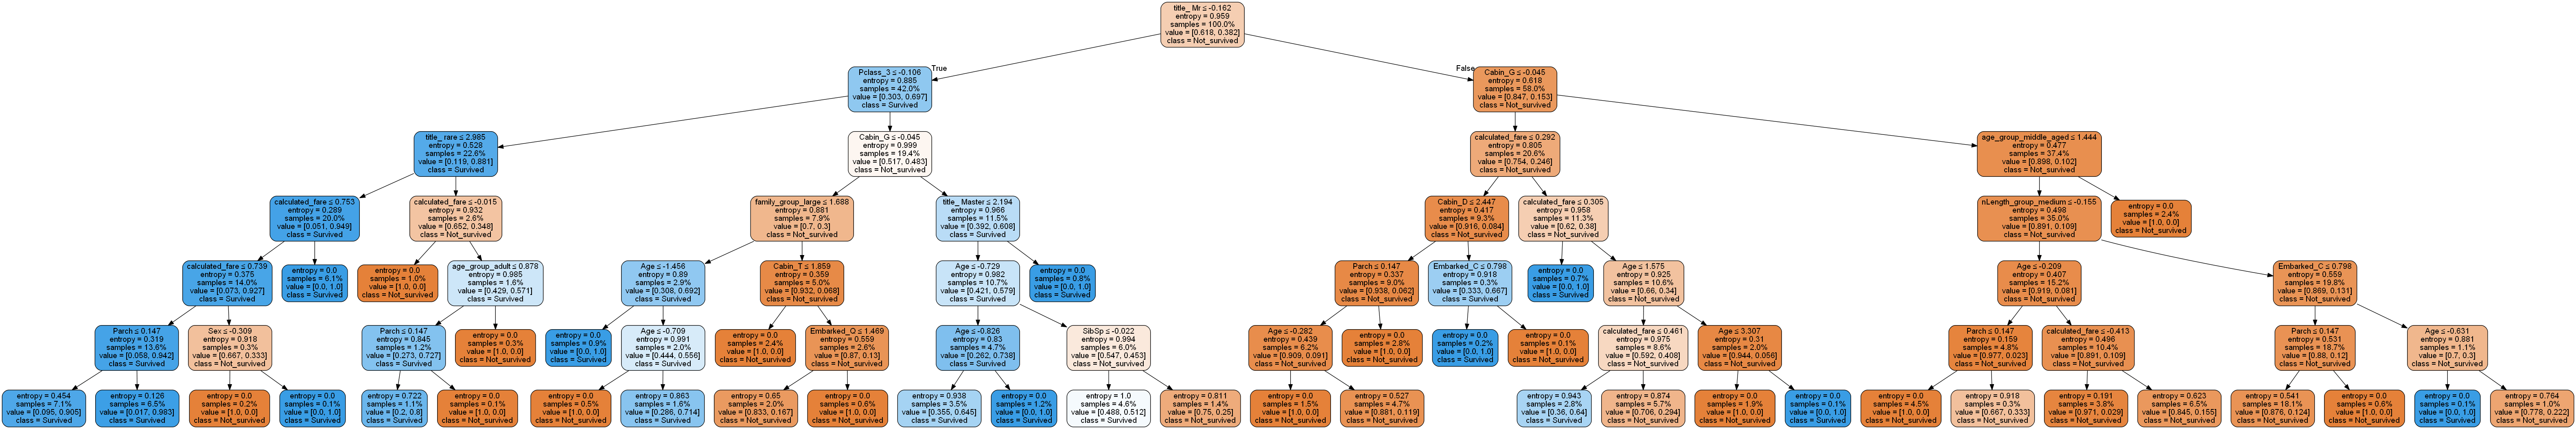

In [82]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=column_names,  class_names = (["Survived" if int(i) is 1 else "Not_survived" for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

## alternative tree
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(decision_tree=dectree_grid, out_file=None, feature_names=column_names, )
#graph = graphviz.Source(dot_data)
#graph.render("house")
#graph

Image(graph.create_png())

Acima está uma árvore de decisão completa. Eu acho que ter uma árvore apresentada assim pode ajudar muito a entender como a árvore de decisão funciona.

In [83]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_ Mr,0.427708
calculated_fare,0.110133
Pclass_3,0.109679
Age,0.088233
title_ rare,0.069856
Cabin_G,0.051594
family_group_large,0.047819
Parch,0.026580
title_ Master,0.011075
Cabin_D,0.010297


Esses são as 10 principais features determinados pelo **Decision Tree**, que ajudaram a classificar o nosso target.

## 7f. Random Forest Classifier
<a id="random_forest"></a>

Admiro trabalhar com árvores de decisão por causa do potencial e do básico que elas fornecem para a construção de um modelo mais complexo como o Random Forest (RF). A RF é um método de conjunto (combinação de muitas árvores de decisão), onde é inserida a parte "floresta". Um detalhe crucial sobre a Floresta Aleatória é que, ao usar uma floresta de árvores de decisão, o modelo de RF <b> pega subconjuntos aleatórios do original conjunto de dados (bootstrapped) </b> e <b> subconjuntos aleatórios das variáveis (features)</b>. Usando esse método, o modelo de RF cria 100's-1000's (a quantidade pode ser determinada manualmente) de uma ampla variedade de árvores de decisão. Essa variedade torna o modelo de RF mais eficaz e preciso. Em seguida, executamos cada ponto de dados de teste em todas essas 100 a 1000 árvores de decisão do modelo de RF e votamos na saída.

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [140, 145, 150, 155, 160], 'max_depth': range(1, 10), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8453183520599251
{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 150}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [86]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8614864864864865

In [87]:
from sklearn.metrics import classification_report
# Print classification report for y_test
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       177
           1       0.75      0.72      0.73       117

   micro avg       0.79      0.79      0.79       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



## Feature Importance

In [88]:
## feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_ Mr,0.167345
Sex,0.141602
calculated_fare,0.086681
Age,0.066412
title_ Miss,0.065665
title_ Mrs,0.058374
Pclass_3,0.053099
Cabin_G,0.025953
family_group_small,0.024445
family_group_large,0.022484


## Pros e contras do boosting

---

### Pros

- Alcança um desempenho superior ao do bagging quando os hiperparâmetros são ajustados adequadamente.
- Pode ser usado para classificação e regressão igualmente bem.
- Lida facilmente com tipos de dados mistos.
- Pode usar funções de perda "robustas" que tornam o modelo resistente a valores discrepantes.

---

### Contras

- Difícil e demorado para ajustar corretamente os hiper-parâmetros.
- Não pode ser paralelo como bagging (escalabilidade ruim quando grandes quantidades de dados).
- Mais risco de overfitting em comparação com bagging.

<h3>fontes: </h3>
<ul>
    <li><a href="http://mccormickml.com/2013/12/13/adaboost-tutorial/">AdaBoost Tutorial-Chris McCormick</a></li>
    <li><a href="http://rob.schapire.net/papers/explaining-adaboost.pdf">Explaining AdaBoost by Robert Schapire(One of the original author of AdaBoost)</a></li>
</ul>

## 7i. Gradient Boosting Classifier
<a id="gradient_boosting"></a>
***

In [89]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.871


<h3>Resources: </h3>
<ul>
    <li><a href="https://www.youtube.com/watch?v=sDv4f4s2SB8">Gradient Descent(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=3CC4N4z3GJc">Gradient Boost(Regression Main Ideas)(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=3CC4N4z3GJc">Gradient Boost(Regression Calculation)(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=jxuNLH5dXCs">Gradient Boost(Classification Main Ideas)(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=StWY5QWMXCw">Gradient Boost(Classification Calculation)(StatQuest)</a></li>
    <li><a href="https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/">Complete Machine Learning Guide to Parameter Tuning in Gradient Boosting (GBM) in Python</a></li>
</ul>


## 7j. XGBClassifier
<a id="XGBClassifier"></a>
***

In [90]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.844


## 7k. Extra Trees Classifier
<a id="extra_tree"></a>
***

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)


0.969


# Part 8: Submit test predictions
<a id="submit_predictions"></a>
***

In [94]:
predict_list_1 = list(XGBClassifier.predict(test))
predict_list_2 = list(ExtraTreesClassifier.predict(test))
predict_list_3 = list(gradient_boost.predict(test))

In [95]:
predict_final = []
for i in range(len(predict_list_1)):
    x = [predict_list_1[i], predict_list_2[i], predict_list_3[i]]
    predict_final.append(max(x,key=x.count))

In [96]:
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": predict_final
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

all_models = [logreg_grid,
              knn_grid, 
              knn_ran_grid,
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              adaBoost_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b
    


test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

# Credits

* To [Brandon Foltz](https://(www.youtube.com/channel/UCFrjdcImgcQVyFbK04MBEhA) for being a fantastic statistics teacher. Love all those inspirational intro's. 
* To [Khan Academy](https://www.khanacademy.org), Amazing place to keep track of my mathematics journey. 
* To [General Assambly](https://generalassemb.ly); Where I started my data science journey. 
* To [Corey Schafer](https://www.youtube.com/channel/UCCezIgC97PvUuR4_gbFUs5g); Corey explains programming terms incredibly well. To all the newcomers, please check out his style of teaching.

# Resources
Here are some of the links I found helpful while writing this kernel. I do not assume them to be great articles; neither do I recommend them. I mentioned them because I have found them to be helpful. 

## Statistics
* [What Is a t-test? And Why Is It Like Telling a Kid to Clean Up that Mess in the Kitchen?](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen)
* [What Are T Values and P Values in Statistics?](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics)
* [What is p-value? How we decide on our confidence level.](https://www.youtube.com/watch?v=E4KCfcVwzyw)

# Kernel base:
https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic
